In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import datetime
import pyproj 
import random
import os
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [51]:
#initial parameters - path
folder_path = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files'
file_path = os.path.join(folder_path, 'EGMS_L3_E44N25_100km_E.csv')
teste = pd.read_csv(file_path)

teste_reduced = teste.iloc[:,list(range(1, 4)) + list(range(11, 375))]
print(teste_reduced)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20211029  20211104  20211110  \


In [52]:
#define the ETRS89-LAEA and the UTM projection
etrs89_laea = pyproj.CRS("EPSG:3035")
wgs84 = pyproj.CRS("EPSG:4326")
utm_32 = pyproj.CRS("EPSG:23032")

In [53]:
teste_new = teste_reduced.copy()

transformer = pyproj.Transformer.from_crs(etrs89_laea, wgs84)
teste_new["latitude"], teste_new["longitude"] = transformer.transform(teste_new["northing"].to_numpy(), teste_new["easting"].to_numpy())

print(teste_new)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20211110  20211116  20211122  \


In [54]:
#teste_new = teste_reduced.copy()

#transformer = pyproj.Transformer.from_crs(etrs89_laea, utm_32)

#for index, row in teste_reduced.iterrows():
 #   northing, easting = row["northing"], row["easting"] 
 #   longitude, latitude = transformer.transform(northing, easting)
 #   teste_new.at[index, "longitude"] = longitude
 #   teste_new.at[index, "latitude"] = latitude

#print(teste_new)

In [296]:
latitude_min = 45.700
latitude_max = 45.900
longitude_min = 12.000
longitude_max = 12.300

teste_area_selected = teste_new[((teste_new['latitude'] > latitude_min) & (teste_new['latitude'] < latitude_max) &
                  (teste_new['longitude'] > longitude_min) & (teste_new['longitude'] < longitude_max))]

print(teste_area_selected)

       easting  northing  height  20160105  20160111  20160117  20160123  \
2367   4499350   2534450    68.0      -0.6      -0.2      -0.3      -1.0   
2369   4499150   2534550    67.9      -0.8      -1.2       0.1       1.4   
2370   4499650   2534550    65.8       0.7       0.5       0.5       0.7   
2371   4499450   2534550    65.5      -1.3      -0.9      -0.2       0.0   
2373   4498950   2534550    70.7       0.2       0.1      -0.3      -0.1   
...        ...       ...     ...       ...       ...       ...       ...   
64139  4478950   2533950   235.8       0.8      -0.7      -0.1       2.1   
64140  4478550   2534050   333.5       5.6       5.6      -0.1       1.9   
64141  4479350   2534050   239.2      -2.9      -3.5      -4.9      -8.8   
64142  4479550   2534050   222.1      -0.3       0.7       0.4       0.7   
64143  4479450   2534050   226.1      -0.3      -0.7      -0.3       0.5   

       20160129  20160204  20160210  ...  20211110  20211116  20211122  \
2367       -1

In [408]:
print(teste_area_selected.loc[50757])

easting      4.481850e+06
northing     2.520850e+06
height       1.164000e+02
20160105    -4.000000e-01
20160111     2.000000e-01
                 ...     
20211210    -3.000000e+00
20211216    -2.600000e+00
20211222    -3.000000e+00
latitude     4.578028e+01
longitude    1.206580e+01
Name: 50757, Length: 369, dtype: float64


In [297]:
def selec_points(teste_area_selected, indice_number):
    points_location = teste_area_selected.iloc[indice_number, 367:369]
    teste_point = teste_area_selected.iloc[indice_number, 3:367]
    teste_point.index = pd.to_datetime(teste_point.index, format='%Y%m%d')
    points_dataframe = pd.DataFrame(teste_point, columns=[teste_point.name])
    return (points_dataframe, points_location)
    
num_points = 100
indicies = random.choices(range(len(teste_area_selected)), k = num_points)
points_dictionaire = {}
points_location_list = []

for indice_number in indicies:
    points_dataframe, points_location = selec_points(teste_area_selected, indice_number)
    points_dictionaire[indice_number] = points_dataframe
    points_location_list.append(points_location)


In [306]:
points_location_df = pd.DataFrame(points_location_list)
points_file_path = "/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/points_location_list_east.csv"
points_location_df.to_csv(points_file_path, index=True)

In [299]:
def linear_detrend(column_name, indice_data):
 
    #getting the linear model to substract from the original time series:    
    x = np.arange(len(indice_data)).reshape(-1, 1)
    y = indice_data.values.reshape(-1, 1)
    
    linear_model = LinearRegression().fit(x, y)
    regression_line = linear_model.predict(x)
    
    detrended_values = y.flatten() - regression_line.flatten()
    #detrended_values = station_data[f'{station_name}_east(m)'].values - regression_line.flatten()
    
    detrended_dataframe = pd.DataFrame(
        detrended_values, 
        index=indice_data.index, 
        columns=[f'{column_name}_east(mm)_detrended'])
        
    return detrended_dataframe


#dictionaries to store the data
detrended_data_dict = {}

#calling the function
for indice_number, indice_data in points_dictionaire.items():
    
    column_name = indice_data.columns[0]
    detrended_dataframe = linear_detrend(
        column_name, 
        indice_data)
    detrended_data_dict[column_name] = detrended_dataframe

#printing dataframe
#stations detrended
#for indice_number, indice_data in detrended_data_dict.items():
    #print(f'{indice_number}: \n{indice_data}\n')

In [300]:
def remove_outliers(indice_number, indice_data):
    limiar_z = 4.0
    
    
    selecting_outliers = indice_data[(np.abs(indice_data-indice_data.mean()) 
                                              < limiar_z*indice_data.std())]
    
    
    outliers_removed_dataframe = pd.DataFrame(selecting_outliers, 
                                              index=indice_data.index)
    
    outliers_removed_dataframe = outliers_removed_dataframe.rename(
        columns={f'{indice_number}_east(mm)_detrended':f'{indice_number}_east(mm)'})  
    
    outliers_removed_dataframe.dropna(inplace=True)
    
    return outliers_removed_dataframe

#dictionaries to store the data
area_outliers_removed_dict = {}

#calling the function
for indice_number, indice_data in detrended_data_dict.items():
    outliers_removed_dataframe = remove_outliers(
        indice_number, 
        indice_data)
    area_outliers_removed_dict[indice_number] = outliers_removed_dataframe

#printing dataframe
#stations detrended
#for indice_number, indice_data in area_outliers_removed_dict.items():
    #print(f'{indice_number}: \n{indice_data}\n')

In [441]:
def create_station_file (
    area_outliers_removed_dict,
    index_selected, 
    station_name,
    folder_path):
    
    station_file = area_outliers_removed_dict[index_selected].squeeze()
    station_file_df = pd.DataFrame(station_file)
    station_file_df.columns = [index_selected]
    
    return station_file_df

station_file_dict = {}
indexes_selected = [50757, 3052, 11504, 32166, 37317, 54942,
                 52529, 35358, 33413, 3909, 20025, 58681,
                 2539, 10927, 45379, 19835, 3413]


for index_selected, station_name, in zip(indexes_selected, [file_station_name]*len(indexes_selected)):
    
    station_file_df = create_station_file(area_outliers_removed_dict,
                                          index_selected, 
                                          station_name,
                                          folder_path)
    
    station_file_dict[index_selected] = station_file_df

In [443]:
station_name = 'mt06_suse'
folder_path = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east/'


concatenated_df = pd.concat(station_file_dict.values(), axis=1)
file_path = os.path.join(folder_path, f'{station_name}.csv')
concatenated_df.to_csv(file_path, index=True)

In [ ]:
# Concatenate all DataFrames in station_file_dict along the columns axis

# Define the folder path where the CSV file will be saved
folder_path = '/path/to/save/csv/files/'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Construct the file path for the CSV file
file_path = os.path.join(folder_path, f'{station_name}_all.csv')

# Save the concatenated DataFrame to a CSV file
concatenated_df.to_csv(file_path, index=False)

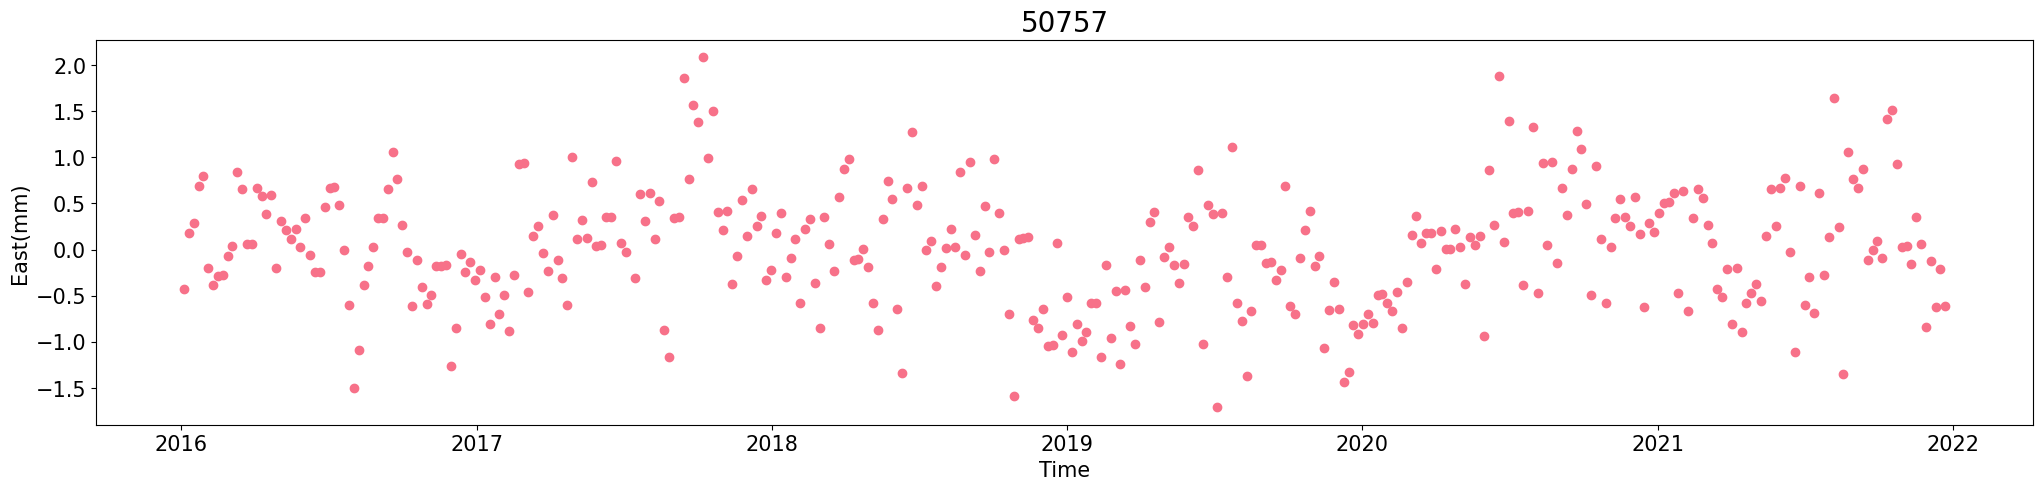

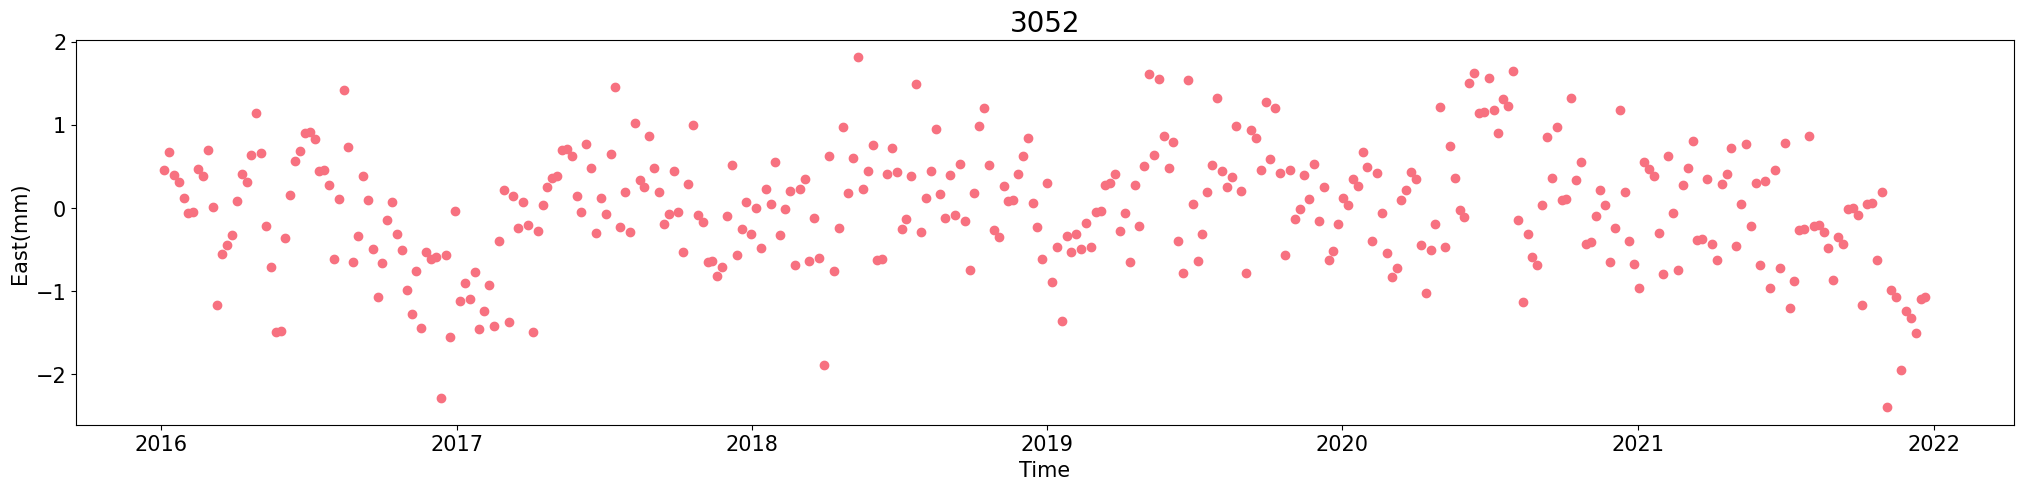

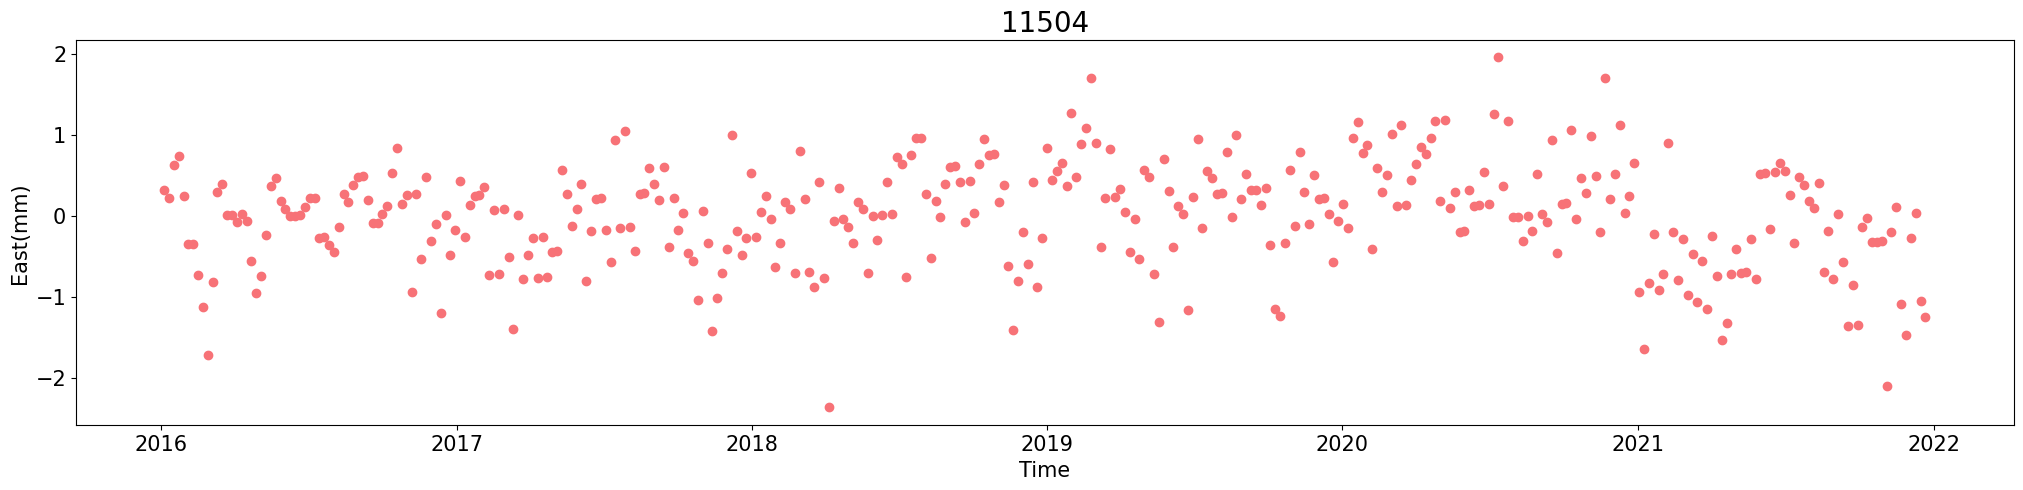

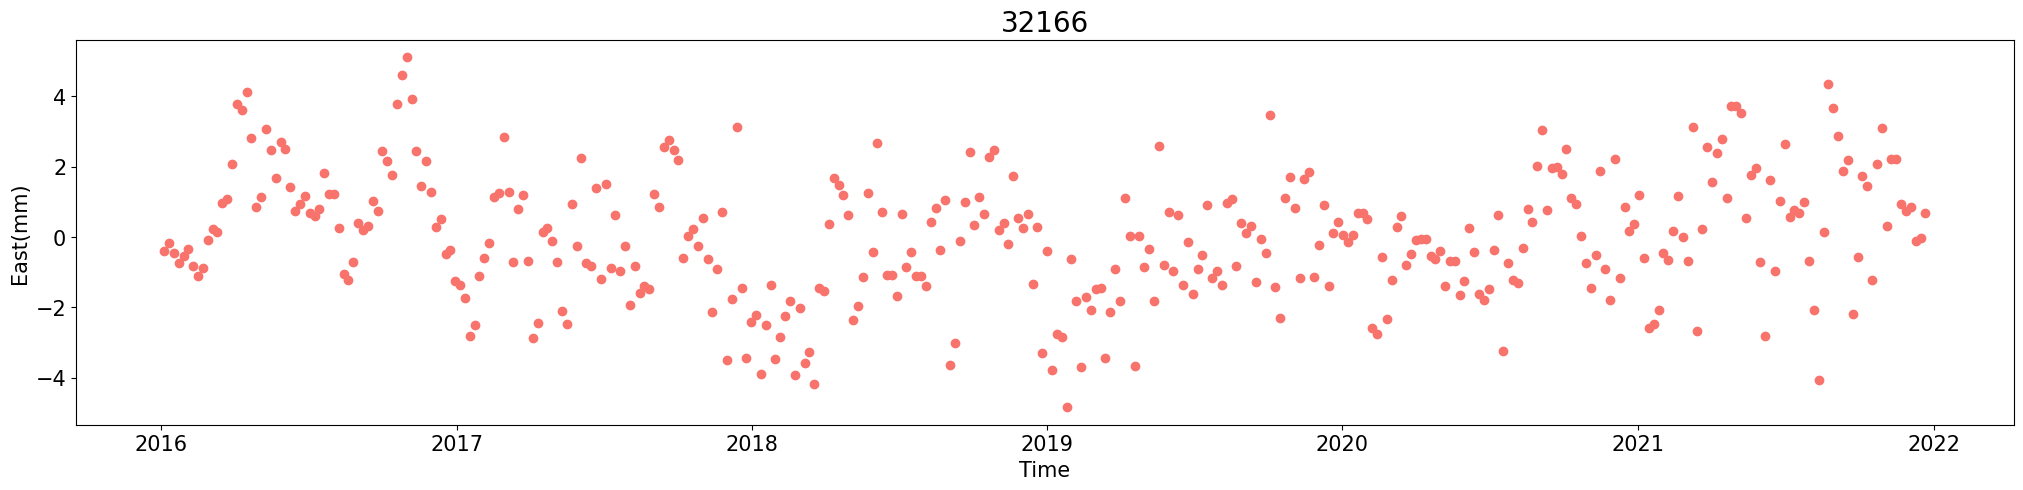

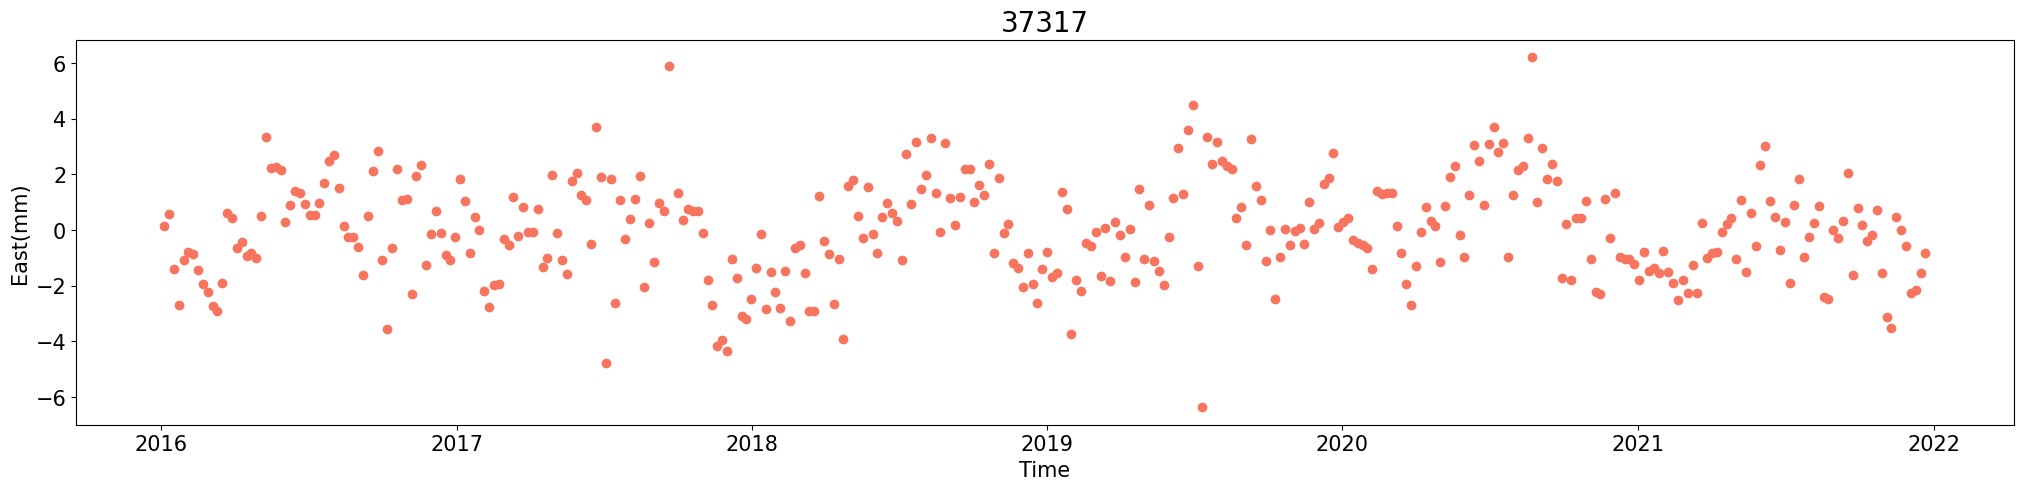

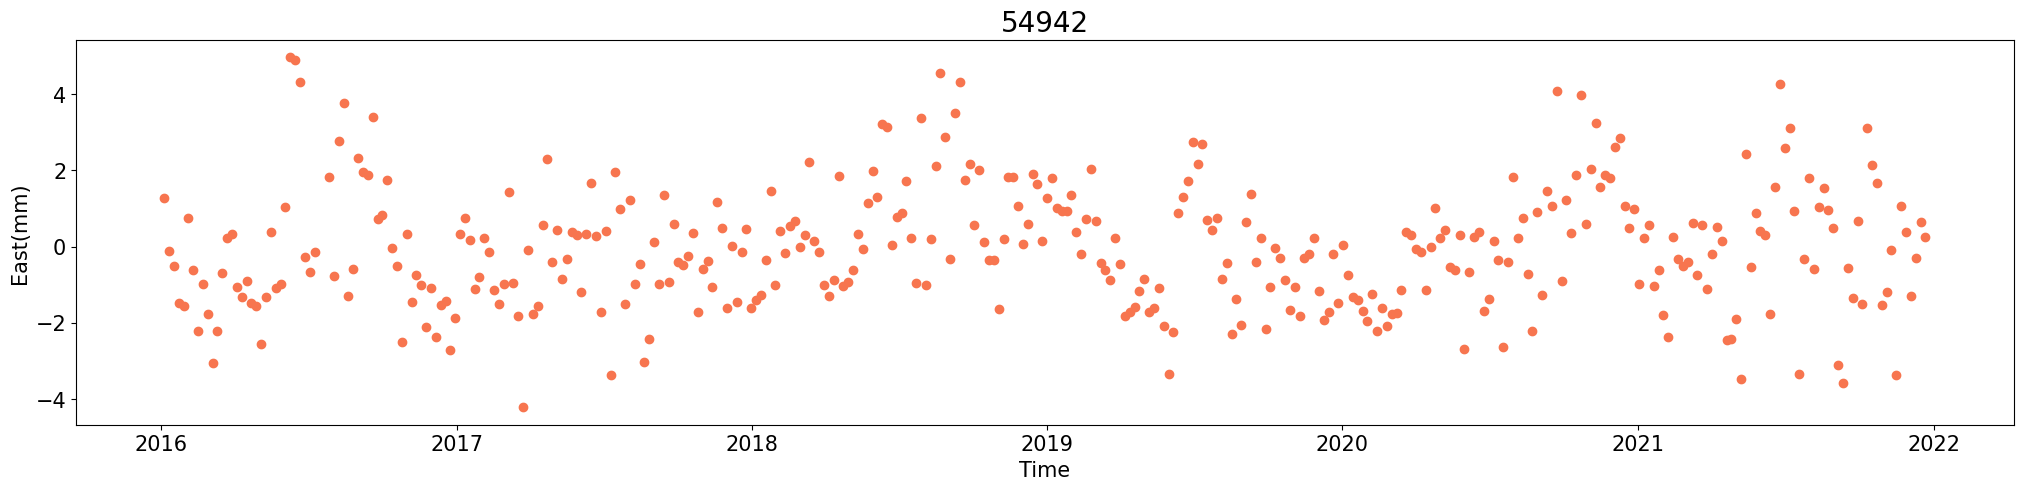

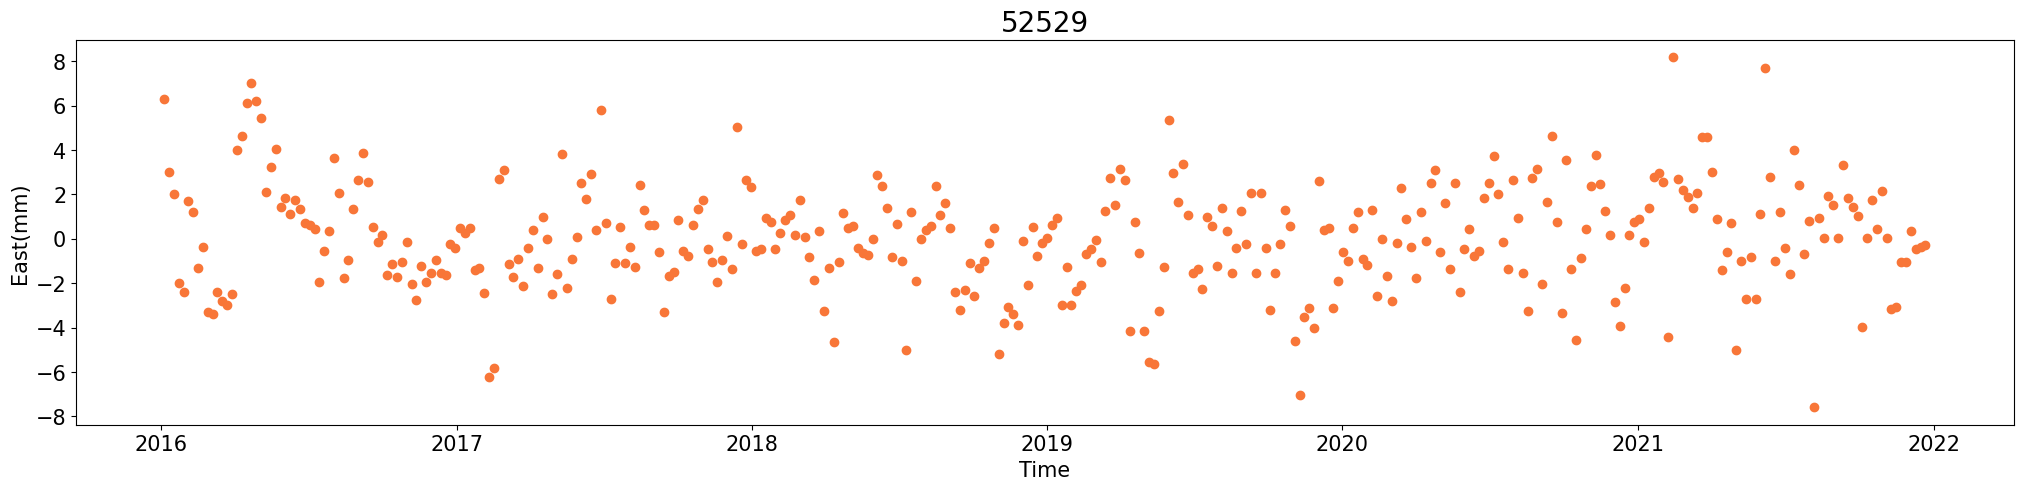

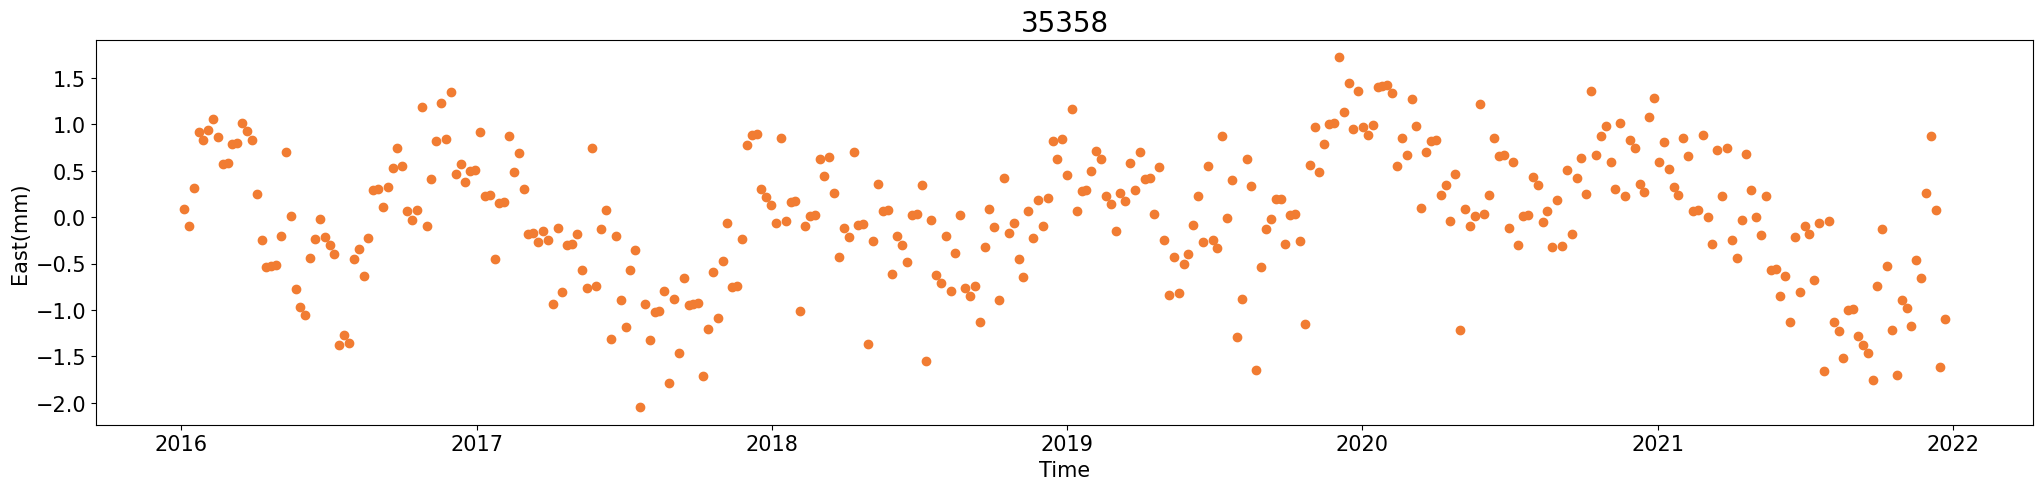

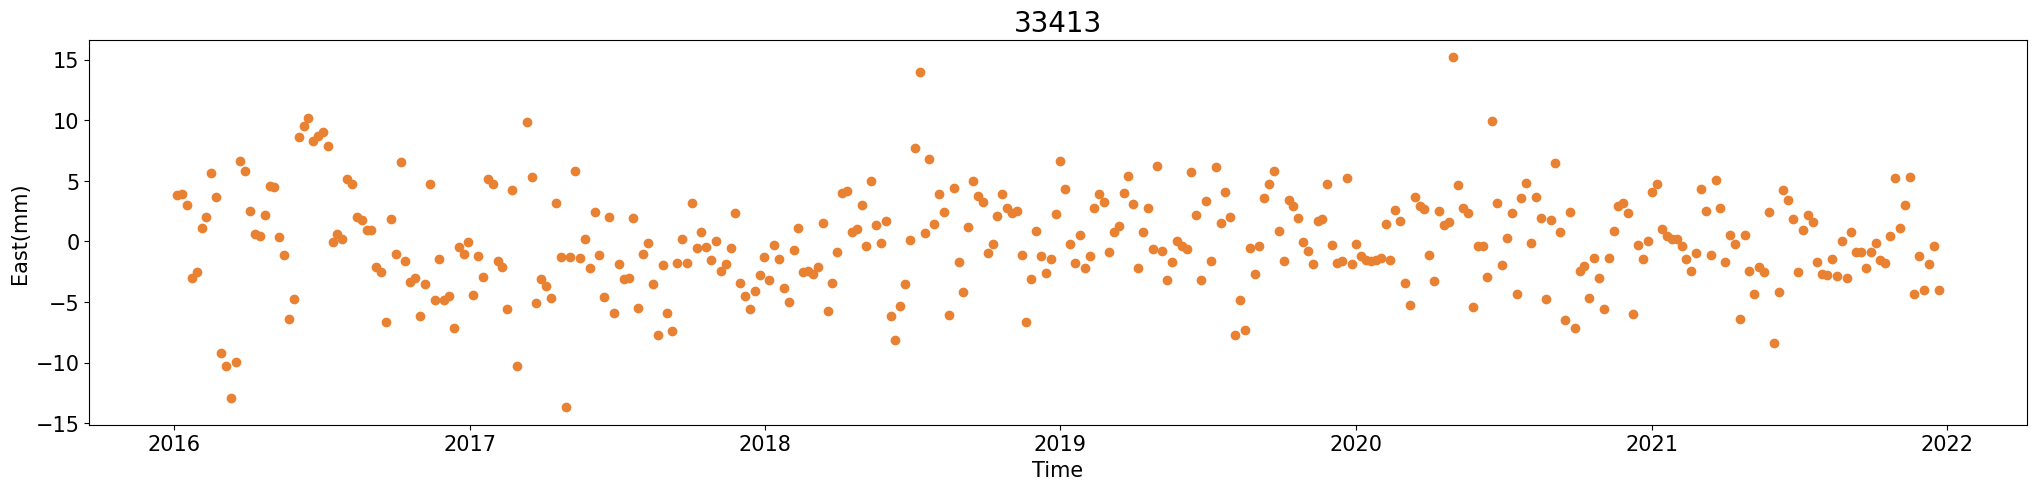

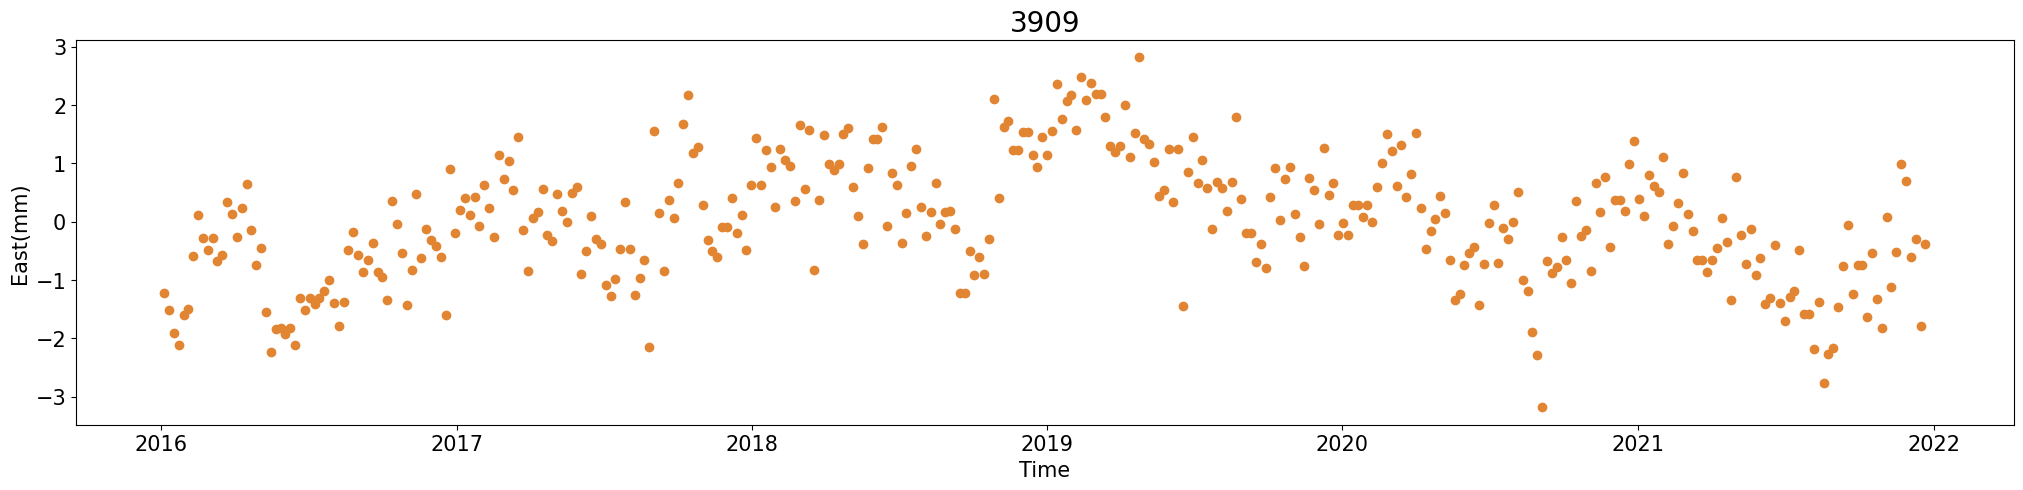

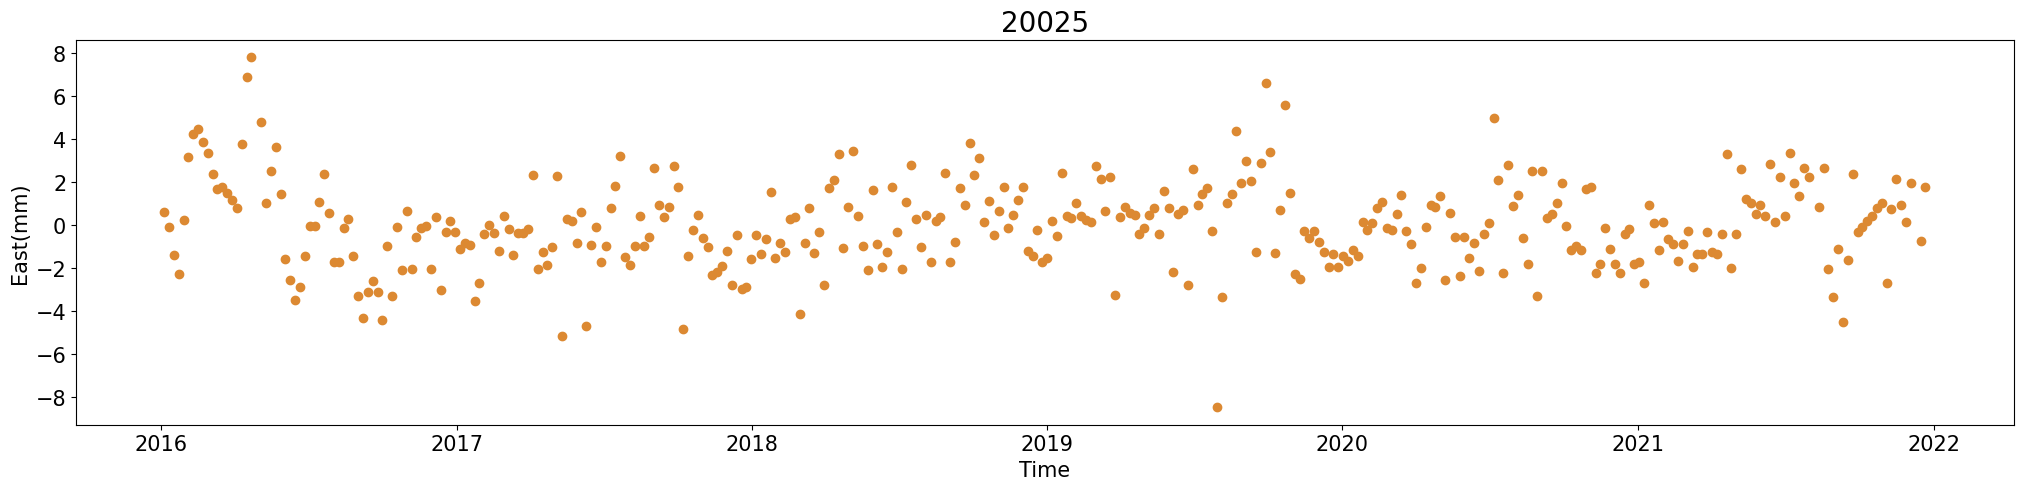

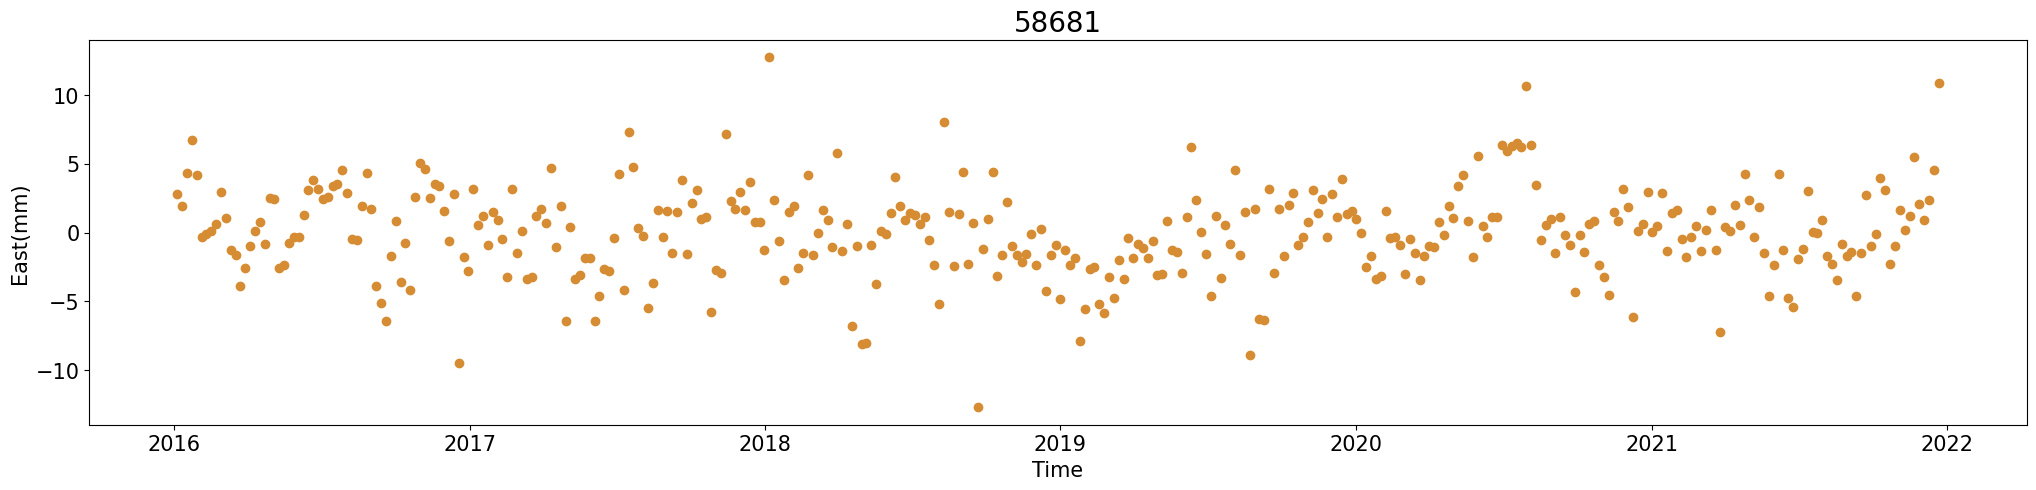

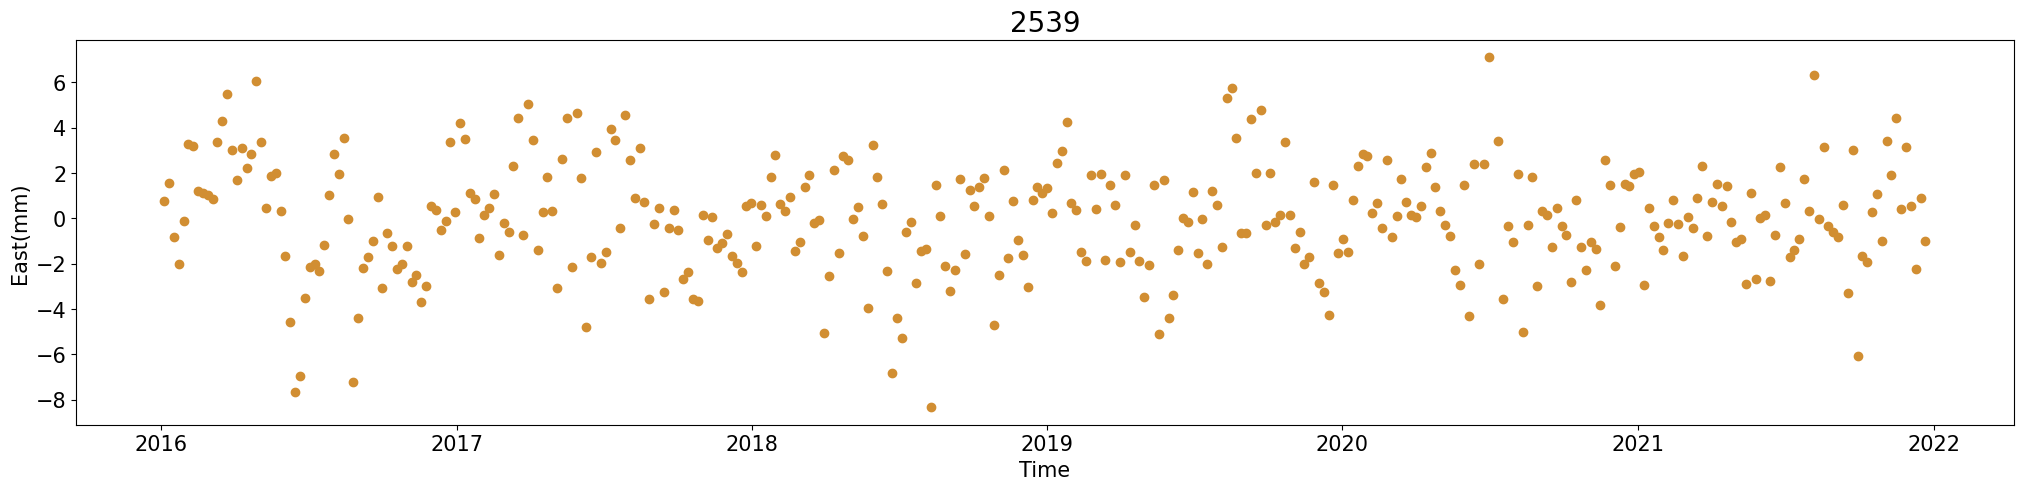

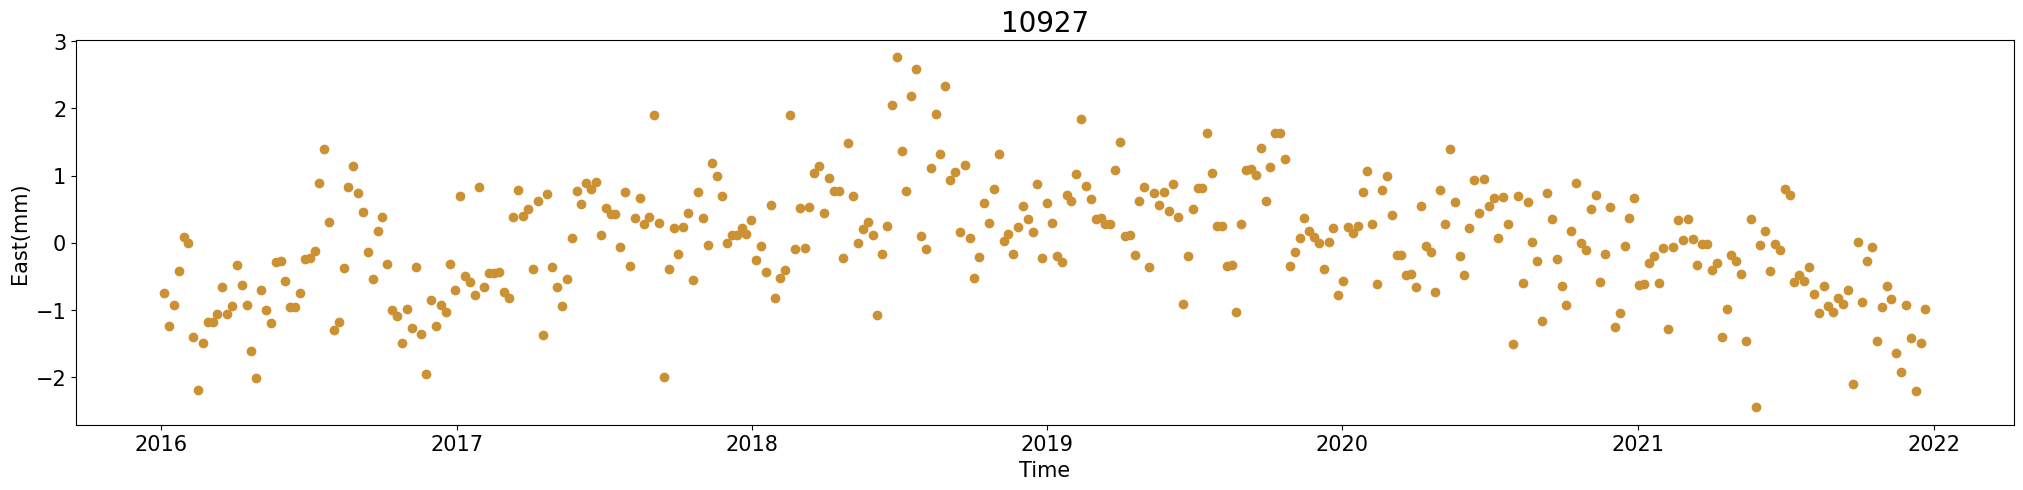

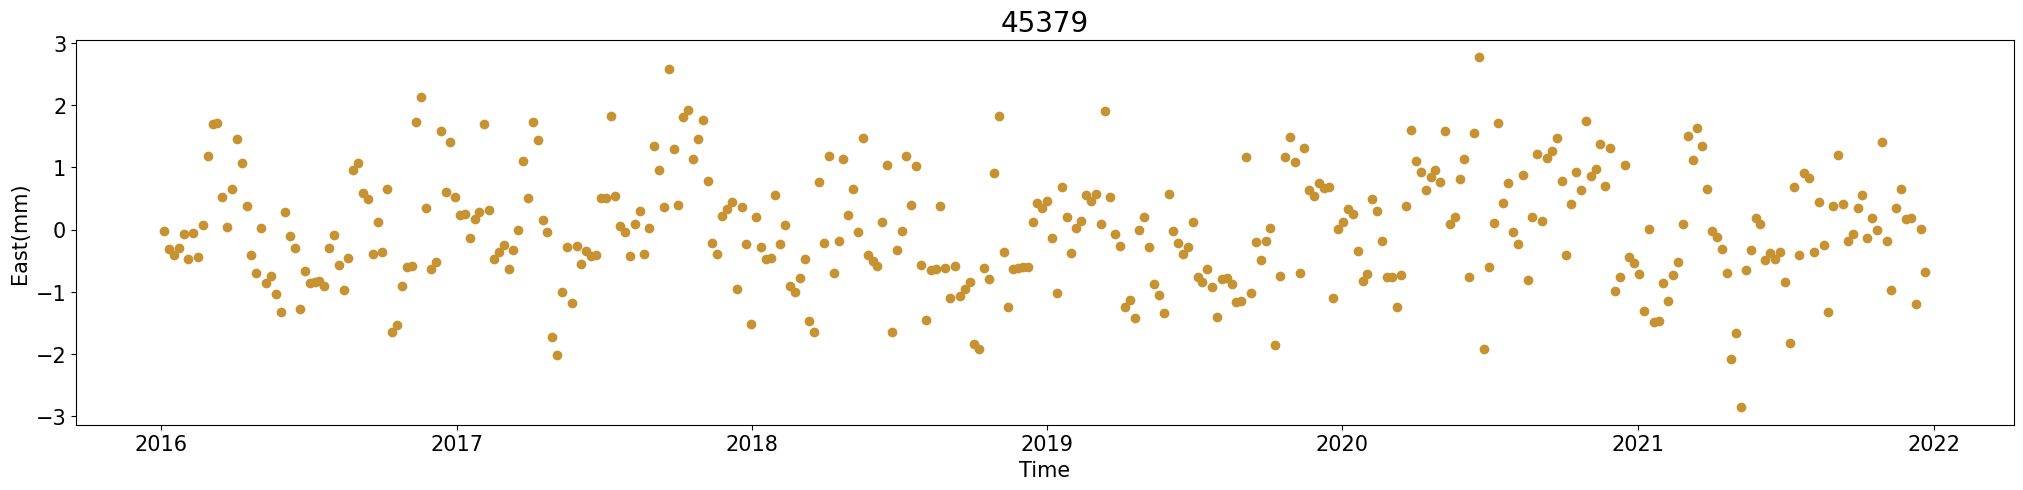

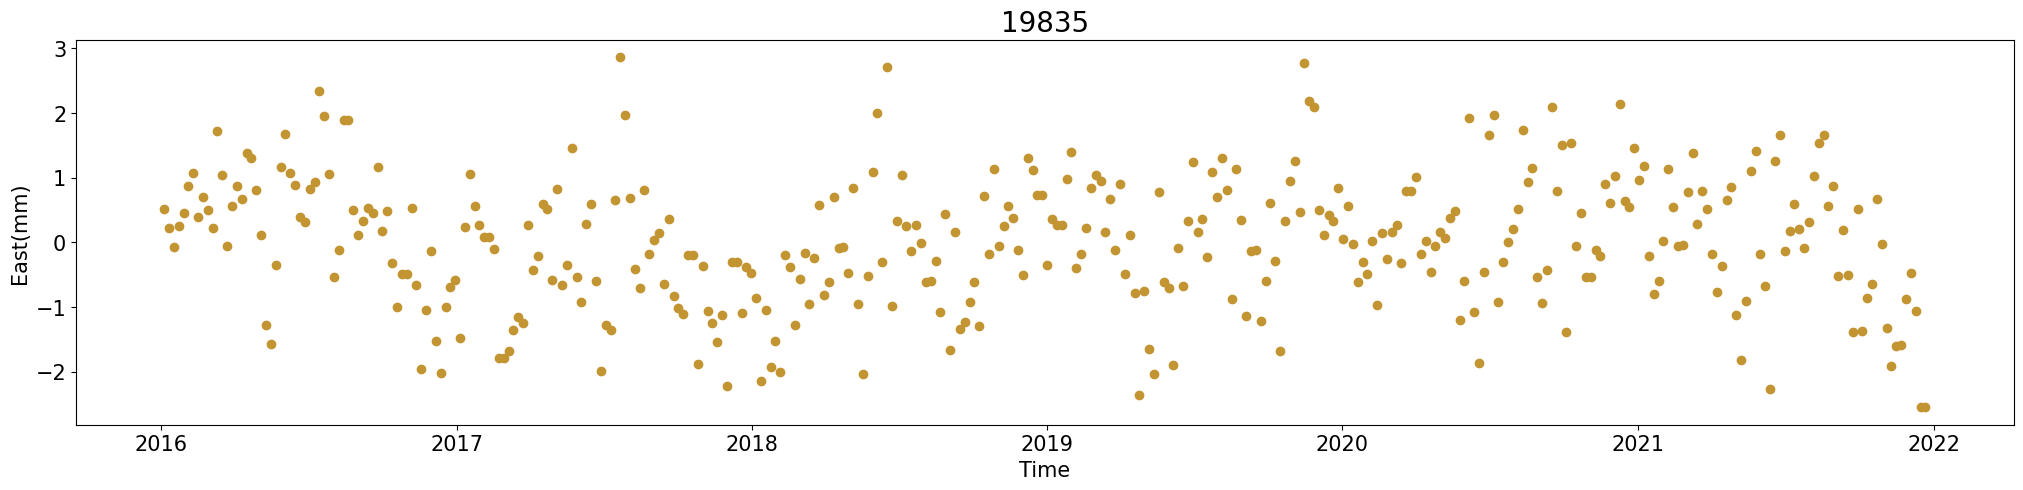

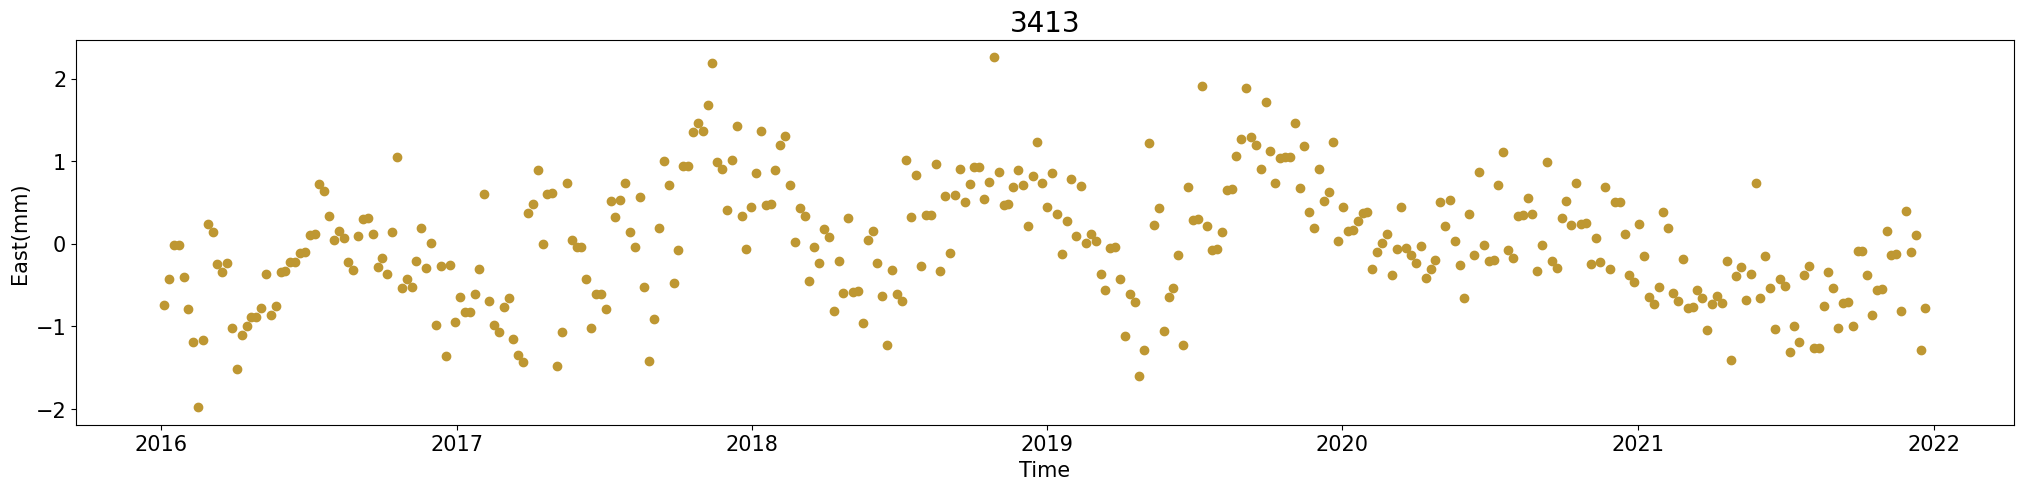

In [409]:
#checking the areas's plots - detrended

colors = sns.color_palette("husl", len(area_outliers_removed_dict))
#folder = ''

for i, (indice_number, indice_data) in enumerate(station_file_dict.items()):
    plt.figure(figsize=(25, 5))
    
    plt.plot(indice_data.index, indice_data, 'o', color = colors[i])
    plt.title(f'{indice_number}', fontsize = 20)
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
   
    #fl = os.path.join(folder, f'{indice_number}.svg')
    #f = io.BytesIO()
    #plt.savefig(fl, format="svg")

    plt.show()

In [411]:
def get_rolling_mean(indice_number, indice_data):
    
    area_rolling_mean = indice_data.rolling(2, min_periods=1).mean()
    
    areas_rolling_mean_dataframe = pd.DataFrame(area_rolling_mean, 
                                              index=indice_data.index)
    
    areas_rolling_mean_dataframe = areas_rolling_mean_dataframe.rename(
        columns={f'{indice_number}_east(mm)':f'{indice_number}_east(mm)_rm'})
    
    areas_rolling_mean_dataframe.dropna(inplace=True)
    
    return areas_rolling_mean_dataframe

#dictionaries to store the data
areas_rolling_mean_dict = {}

#calling the function
for indice_number, indice_data in station_file_dict.items():
    areas_rolling_mean_dataframe = get_rolling_mean(indice_number, indice_data)
    areas_rolling_mean_dict[indice_number] = areas_rolling_mean_dataframe

#printing dataframe
#stations detrended
for indice_number, indice_data in areas_rolling_mean_dict.items():
    print(f'{indice_number}: \n{indice_data}\n')

50757: 
               50757
2016-01-05 -0.428945
2016-01-11 -0.125612
2016-01-17  0.231053
2016-01-23  0.487718
2016-01-29  0.744383
...              ...
2021-11-28 -0.389510
2021-12-04 -0.482845
2021-12-10 -0.376180
2021-12-16 -0.419514
2021-12-22 -0.412849

[363 rows x 1 columns]

3052: 
                3052
2016-01-05  0.461326
2016-01-11  0.568849
2016-01-17  0.533894
2016-01-23  0.348939
2016-01-29  0.213984
...              ...
2021-11-28 -1.594964
2021-12-04 -1.279919
2021-12-10 -1.414873
2021-12-16 -1.299828
2021-12-22 -1.084783

[364 rows x 1 columns]

11504: 
               11504
2016-01-05  0.316587
2016-01-11  0.269936
2016-01-17  0.426633
2016-01-23  0.683331
2016-01-29  0.490028
...              ...
2021-11-28 -1.282439
2021-12-04 -0.875742
2021-12-10 -0.119045
2021-12-16 -0.512348
2021-12-22 -1.155650

[364 rows x 1 columns]

32166: 
               32166
2016-01-05 -0.389669
2016-01-11 -0.283627
2016-01-17 -0.321543
2016-01-23 -0.609459
2016-01-29 -0.647375
...         

In [62]:
#outliers_removed_df, df_rolling_mean = outliers_removed_df.align(df_rolling_mean, join='inner')

#point_mse = mean_squared_error(outliers_removed_df, df_rolling_mean)
#print(point_mse)

#point_r2 = r2_score(outliers_removed_df,df_rolling_mean)
#print(point_r2)

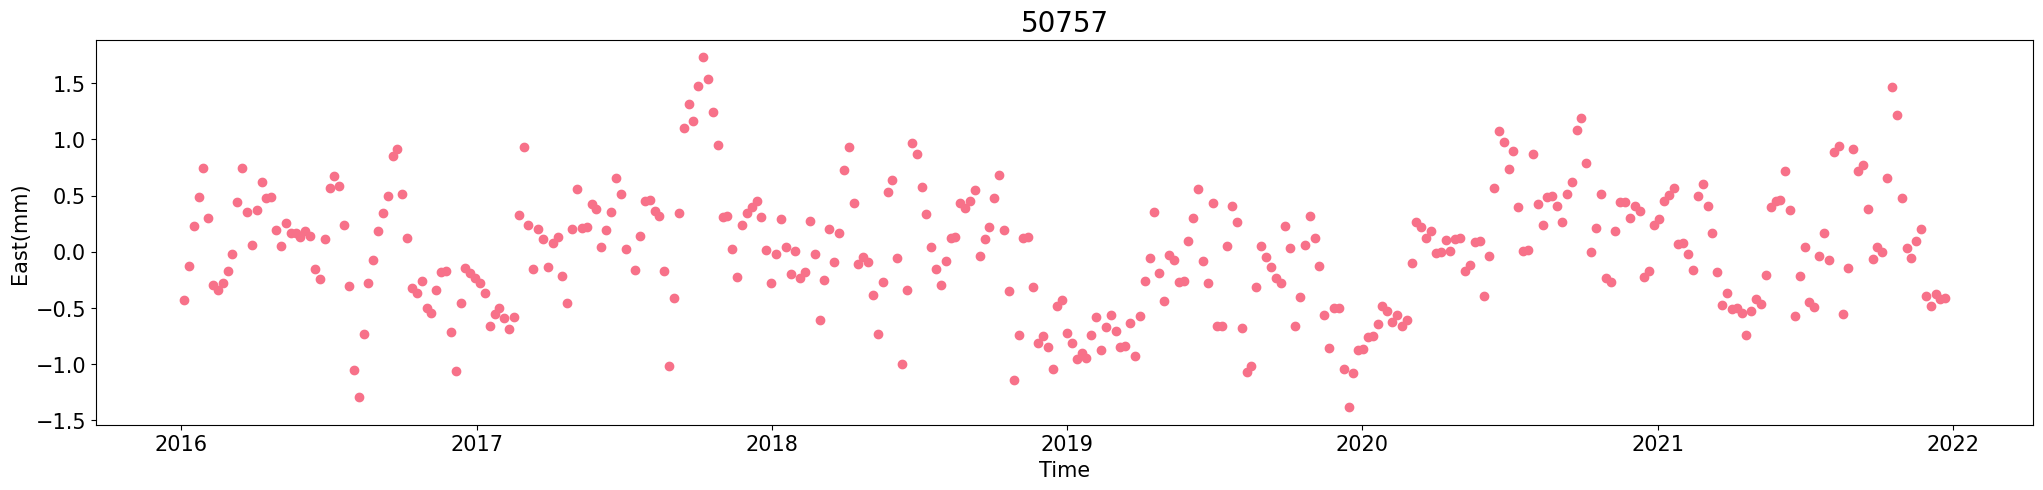

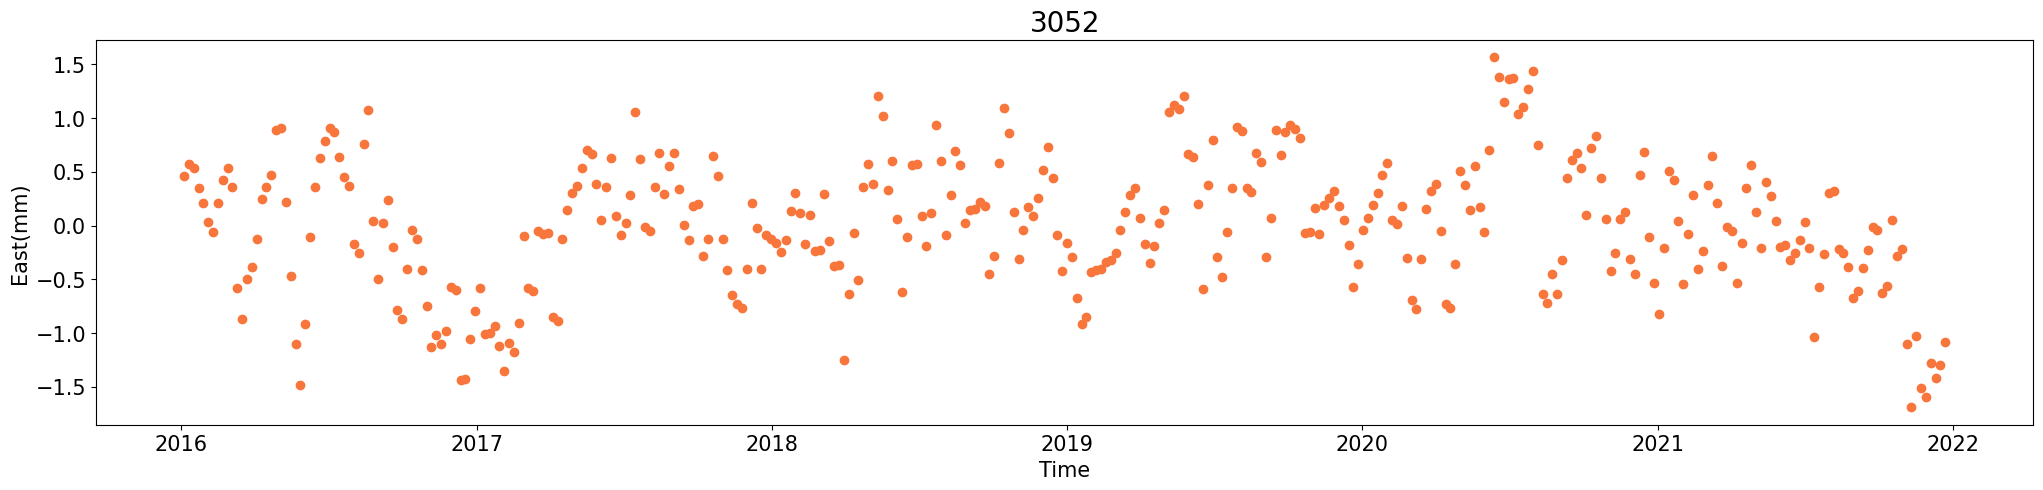

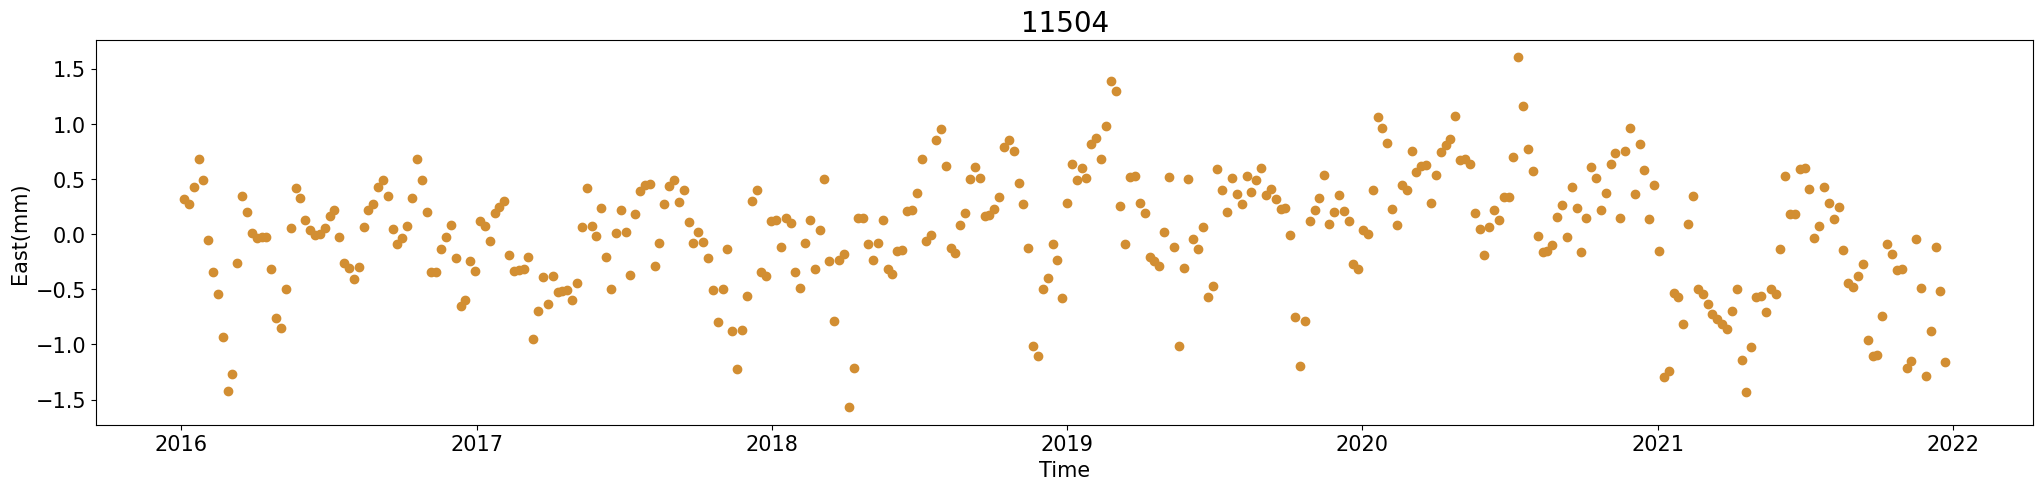

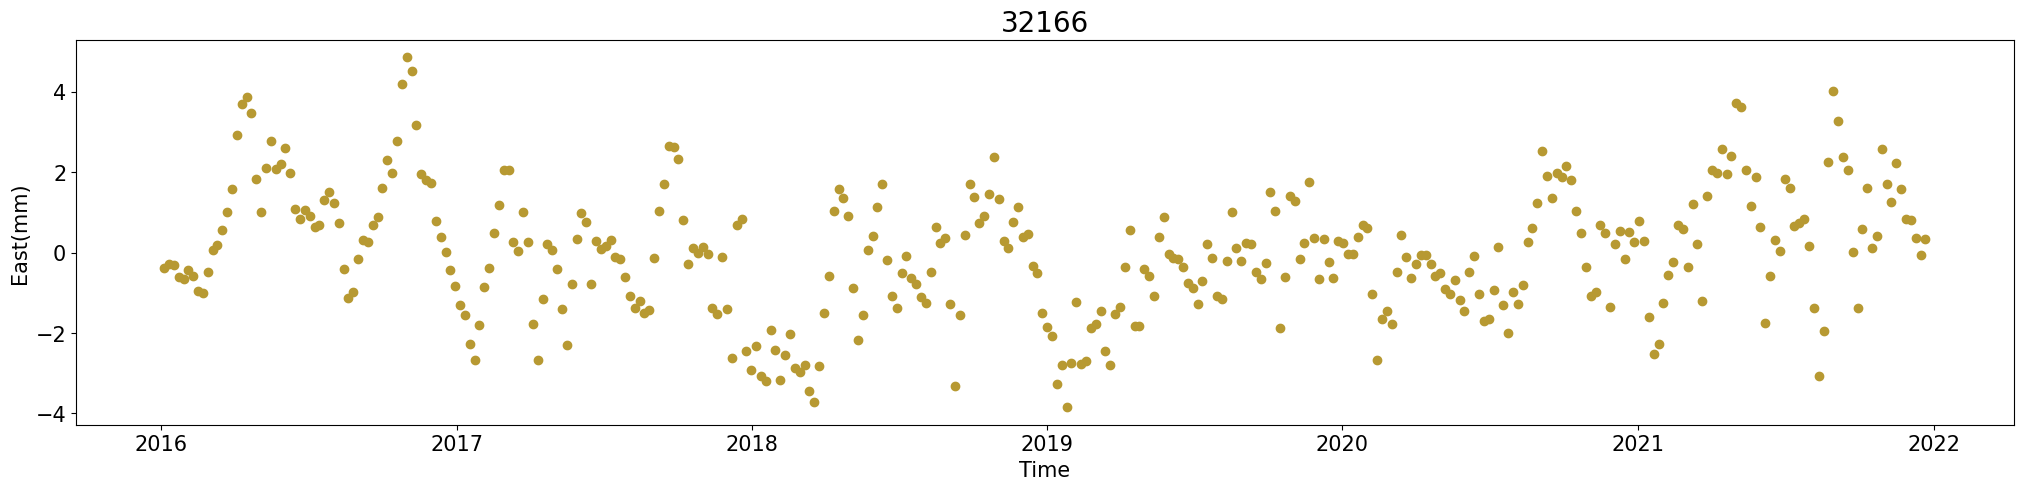

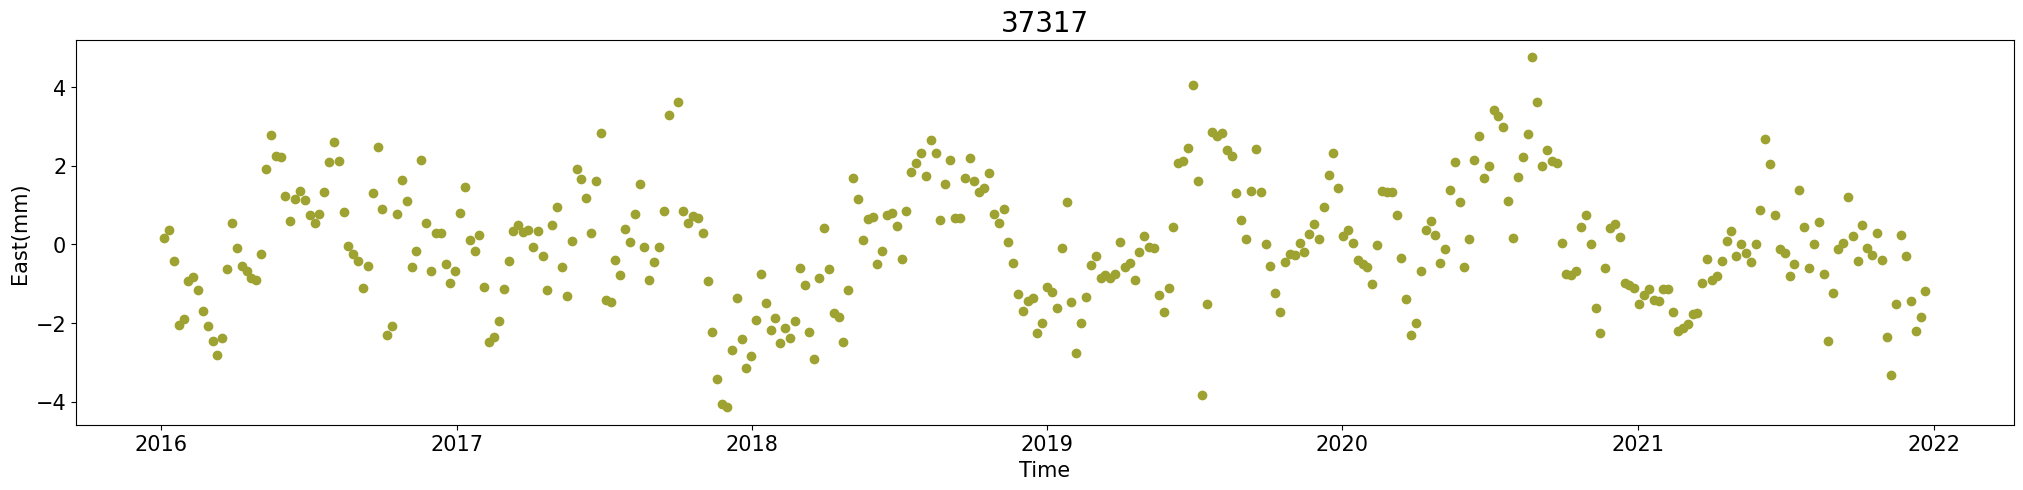

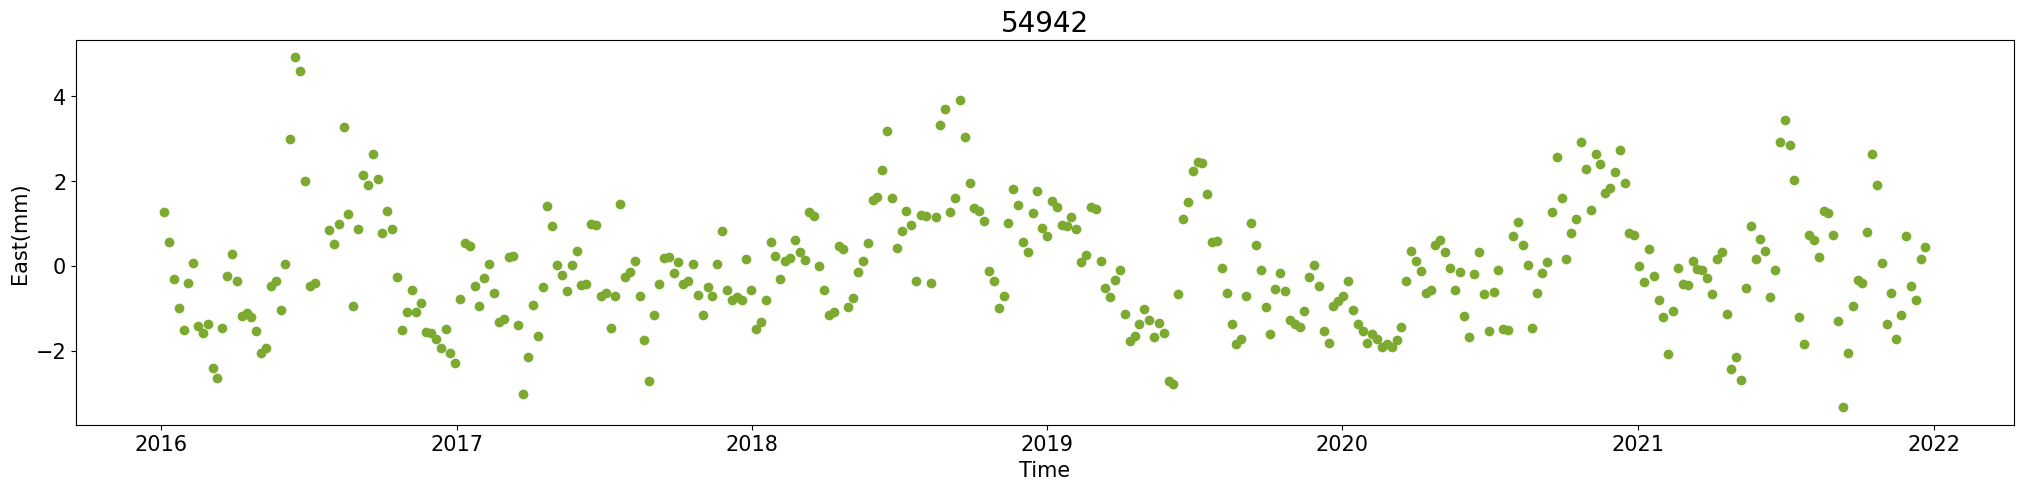

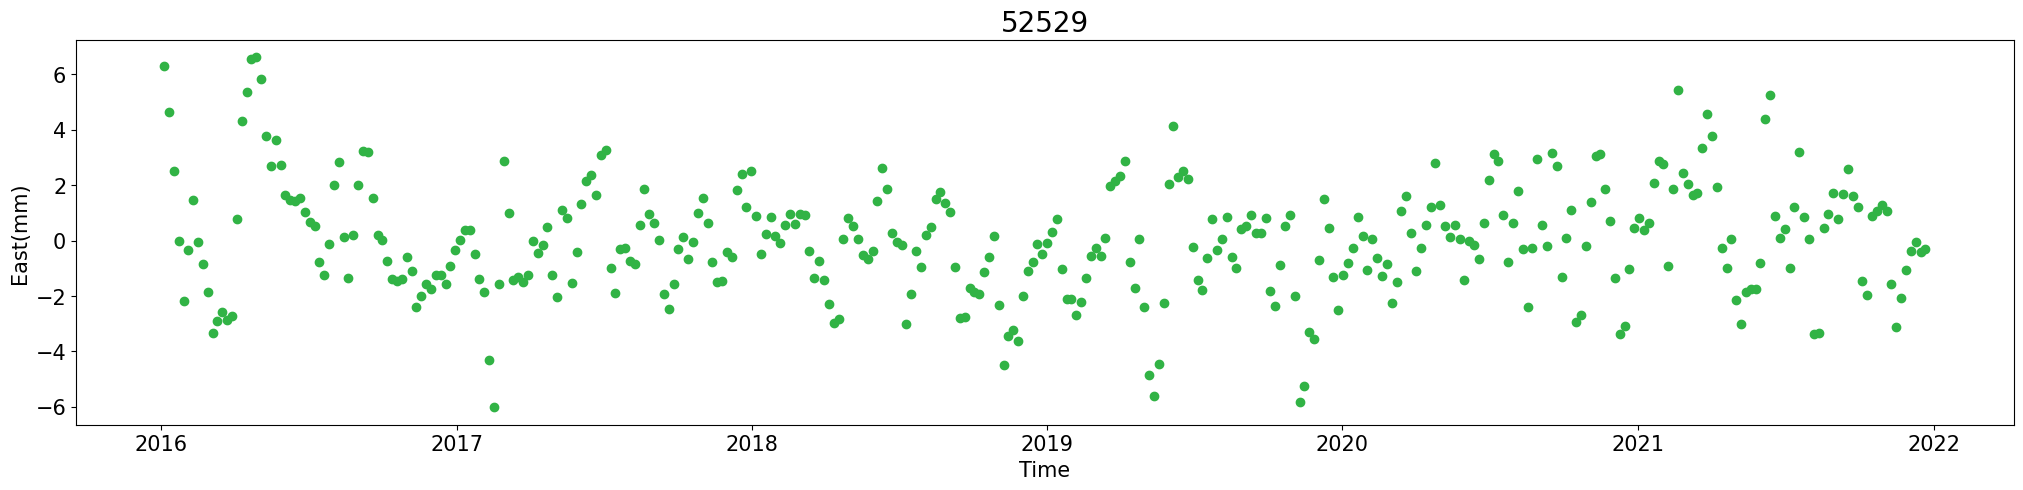

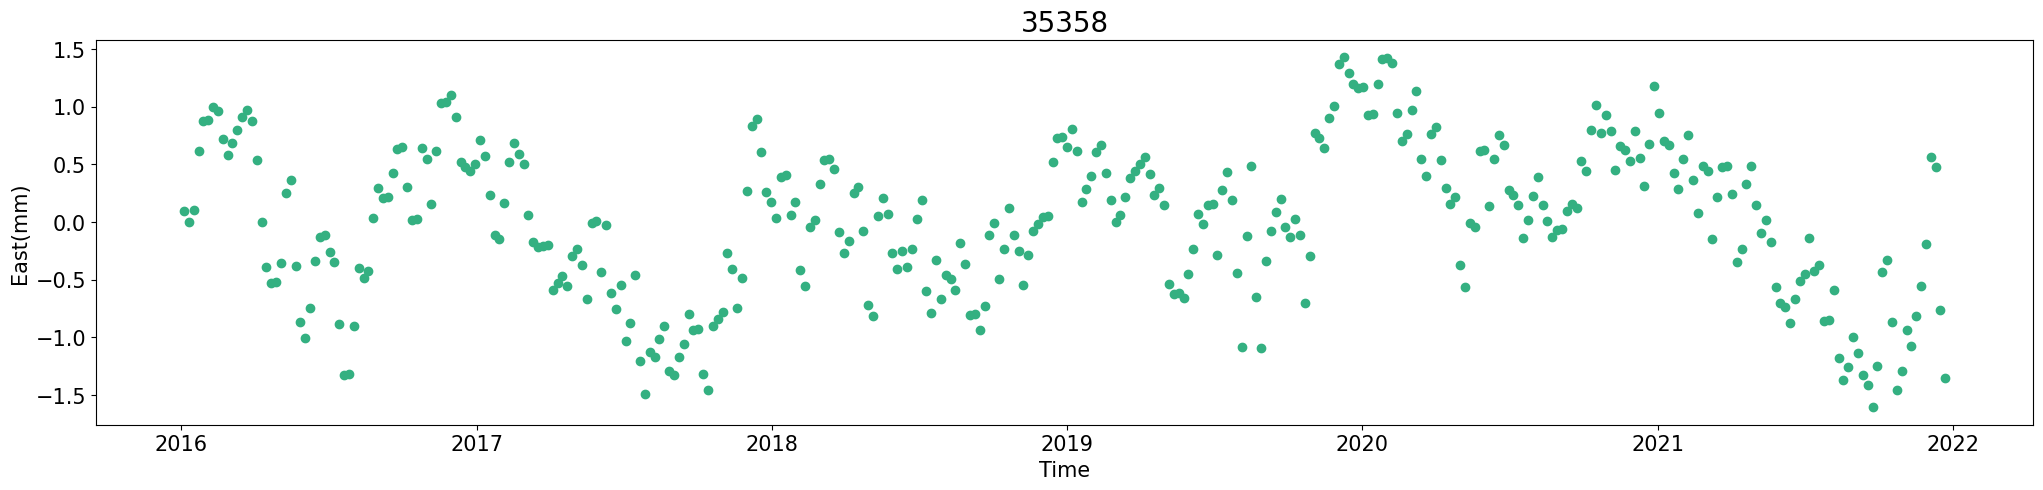

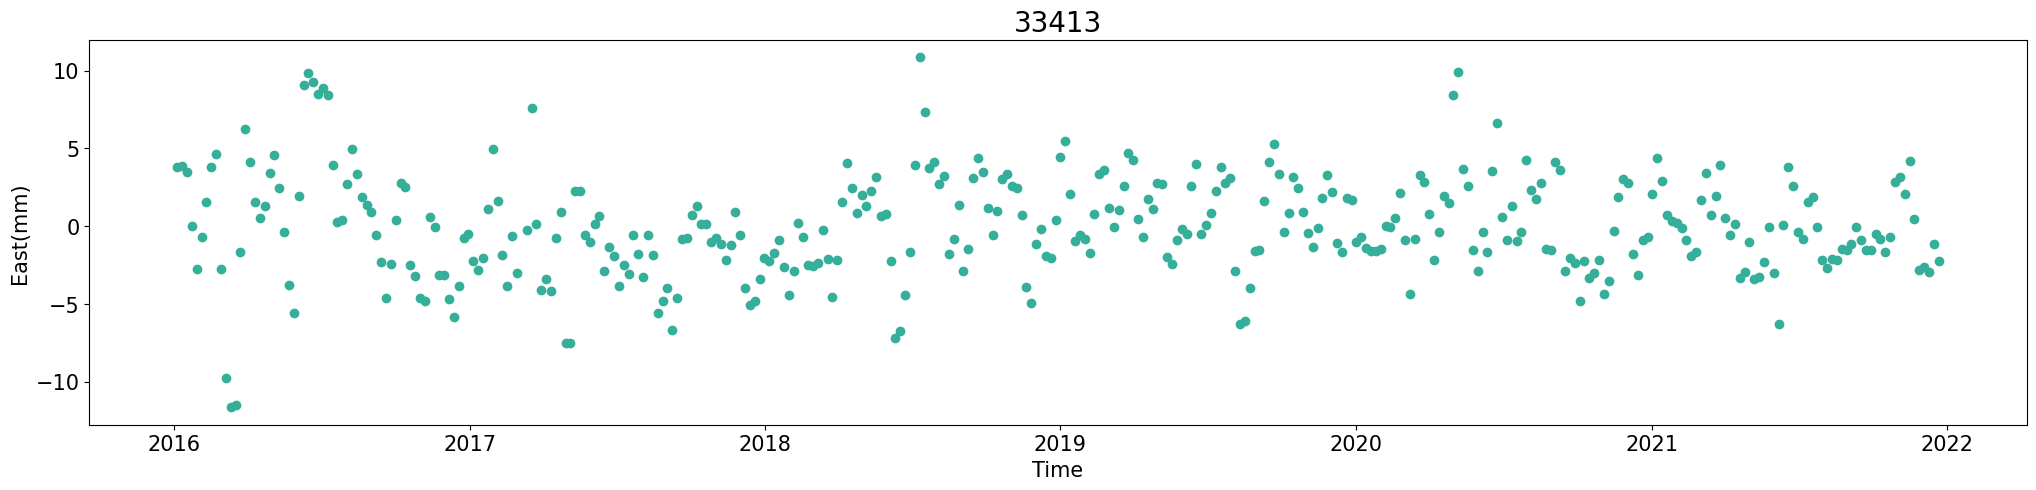

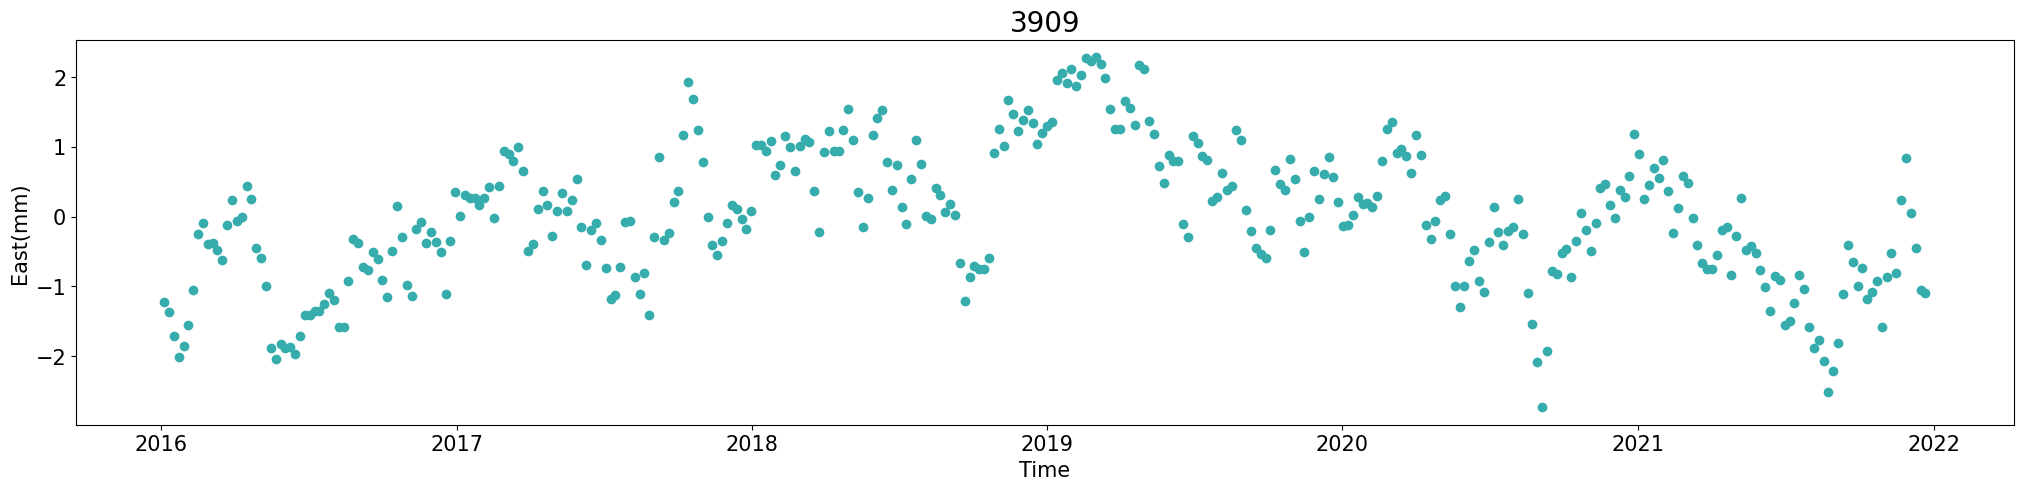

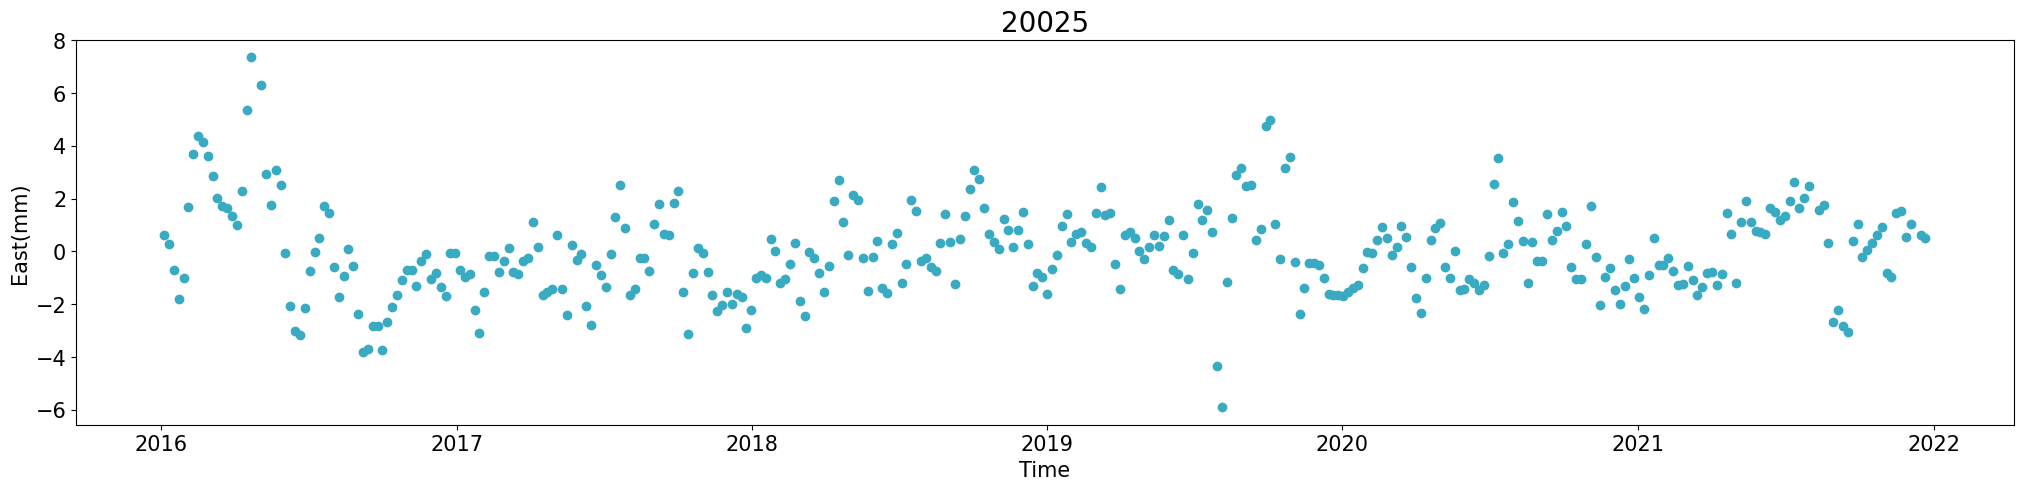

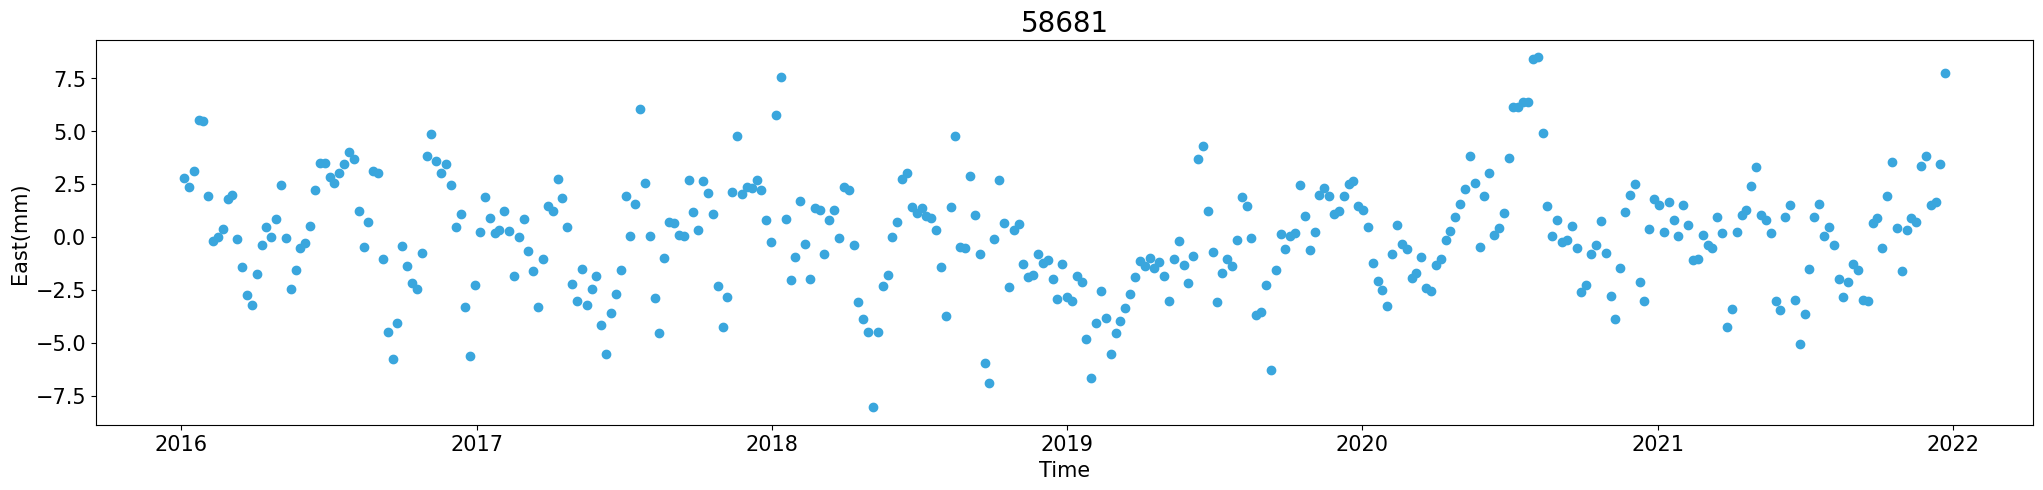

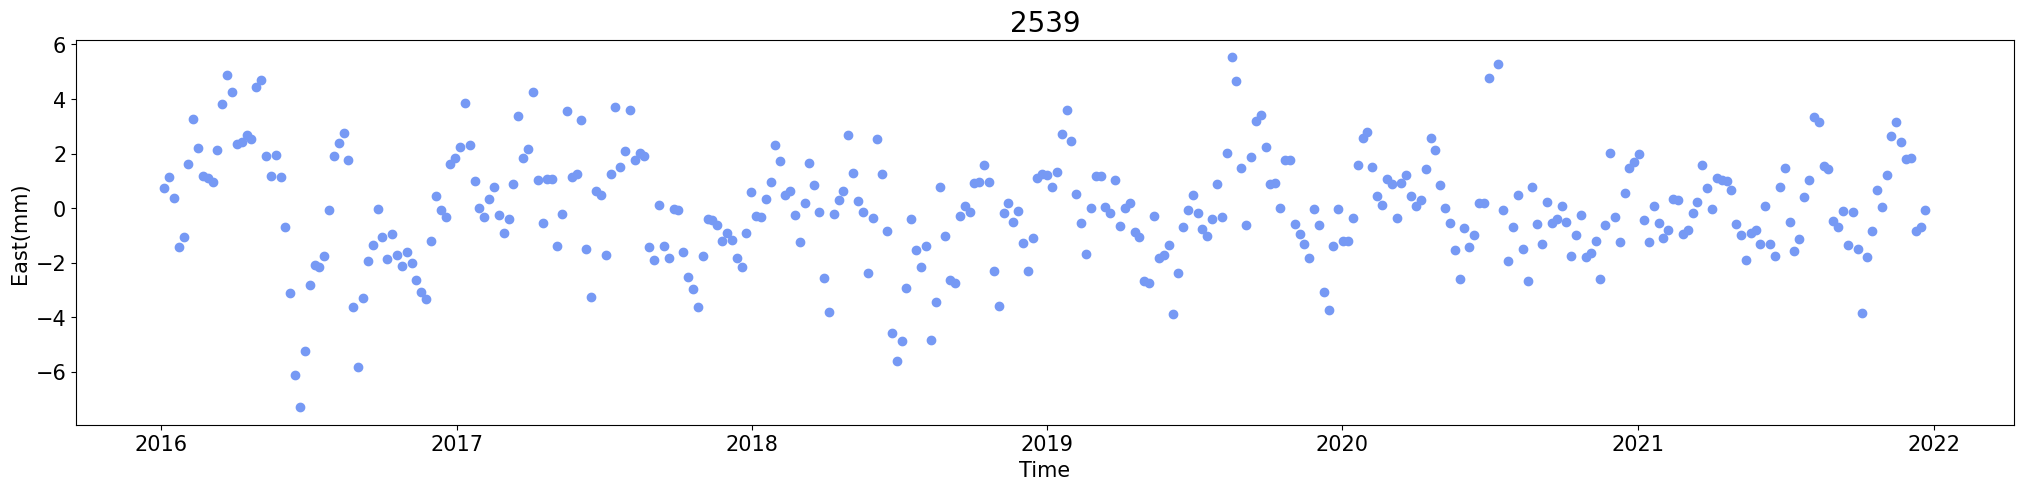

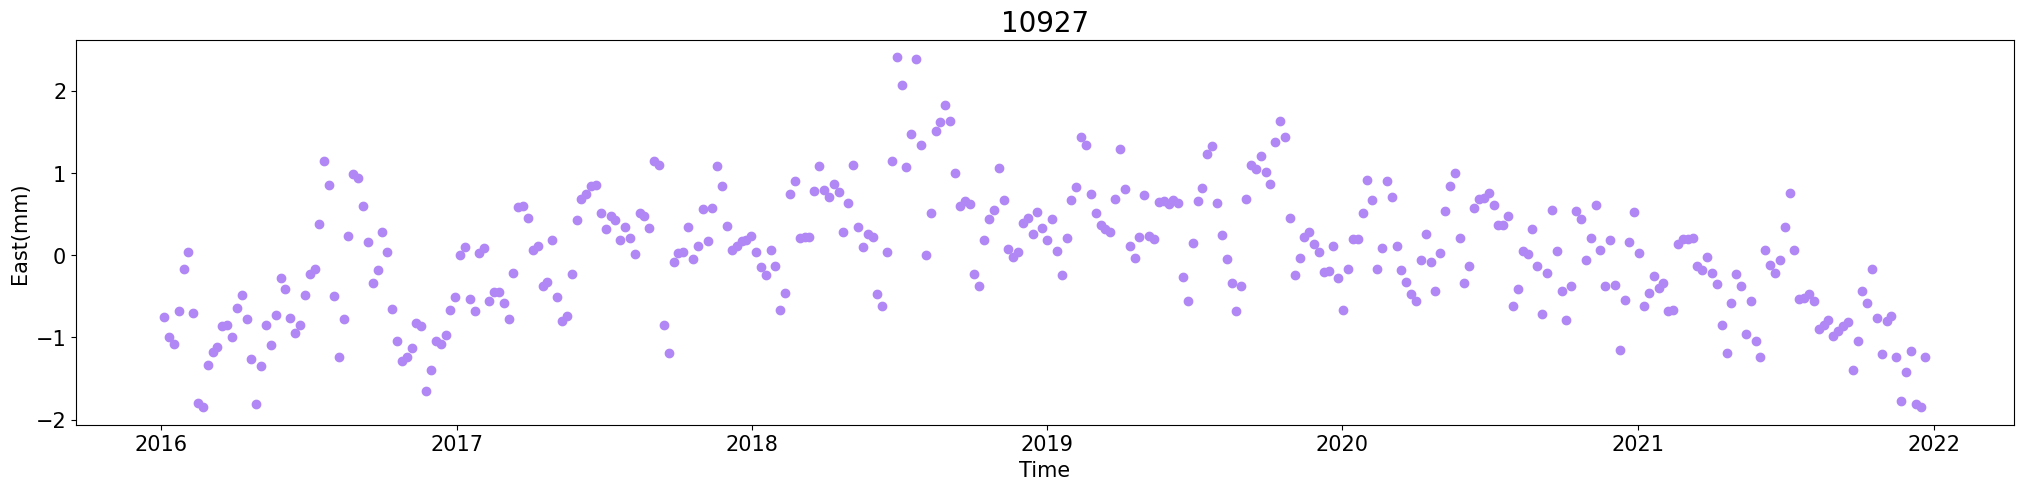

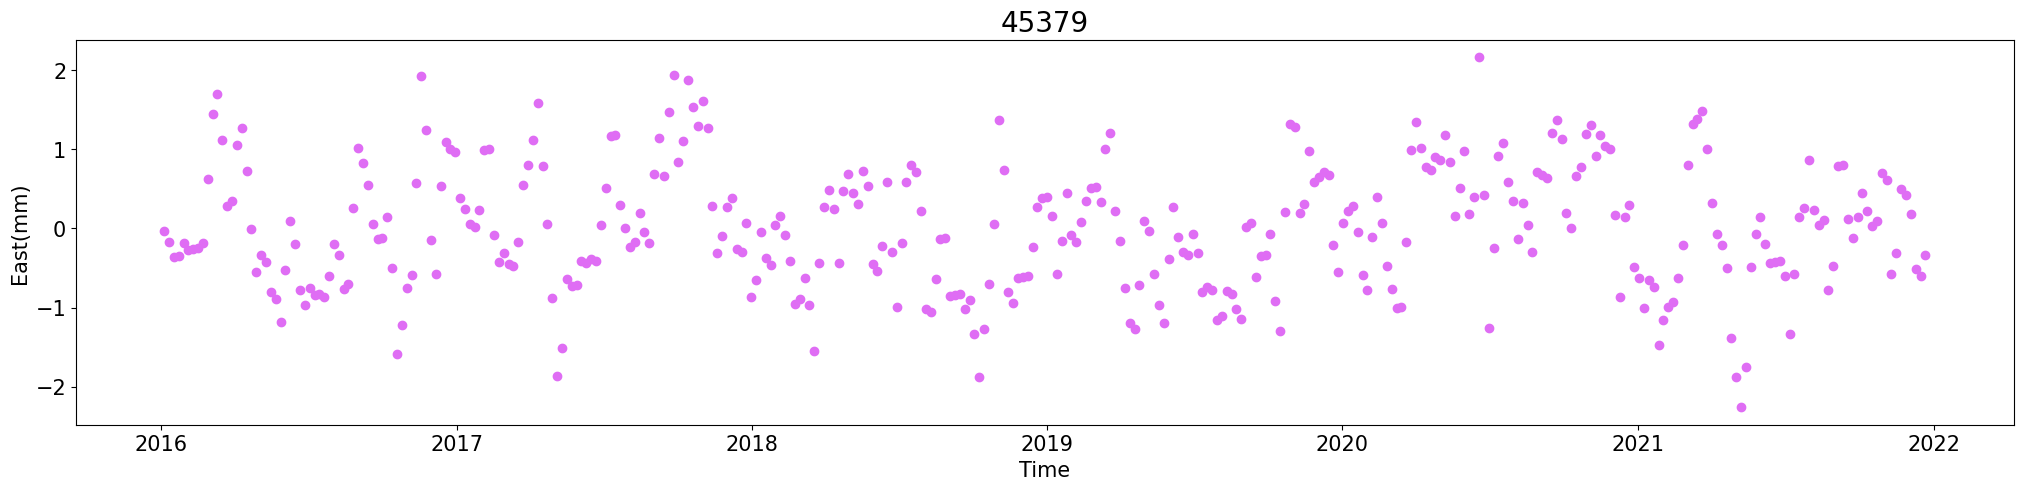

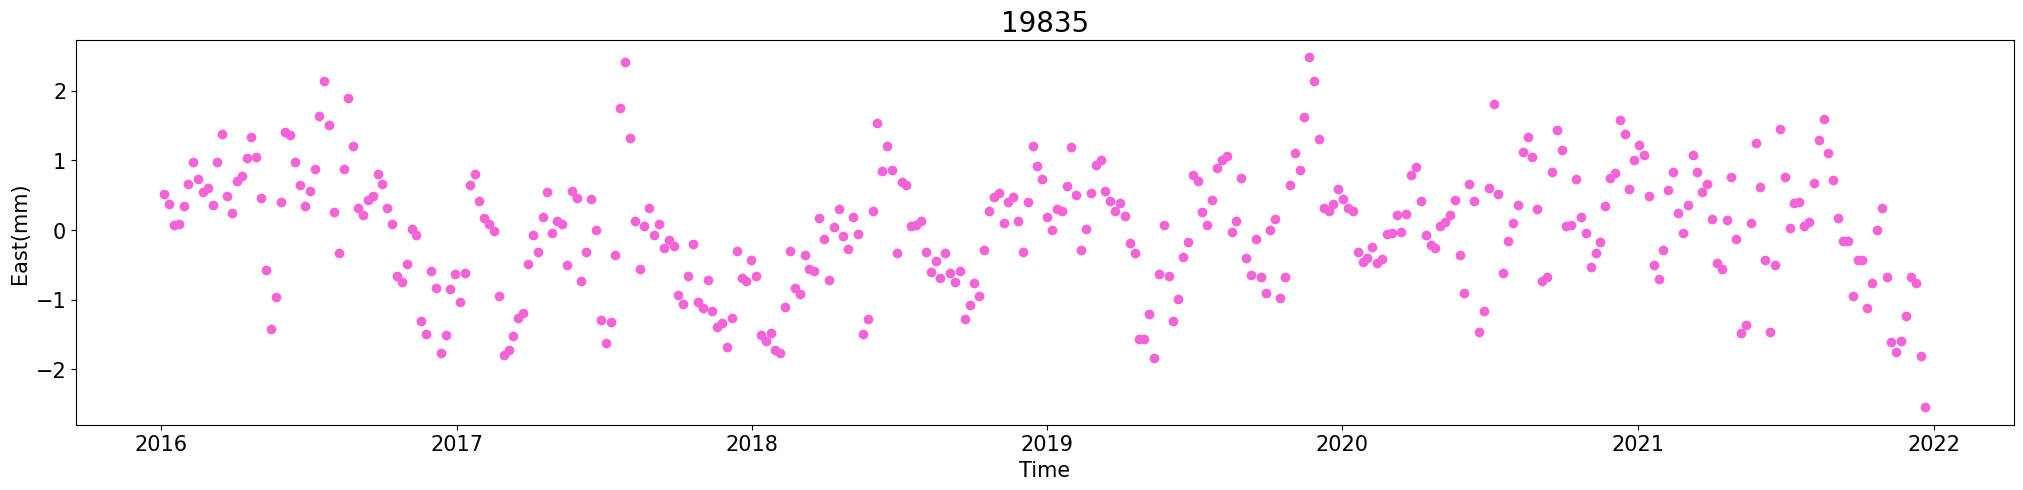

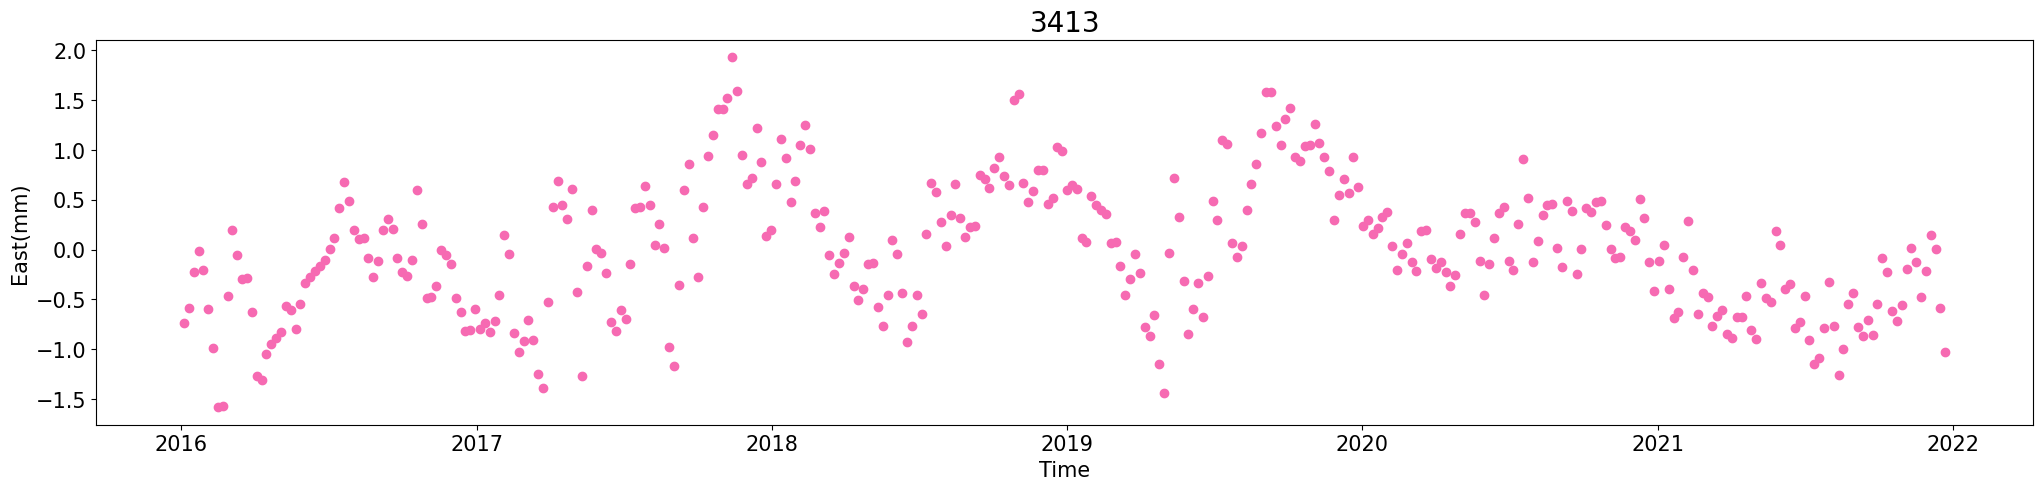

In [412]:
#checking the areas's plots - rolling mean

colors = sns.color_palette("husl", len(areas_rolling_mean_dict))
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east/points_rolling_mean'

for i, (indice_number, indice_data) in enumerate(areas_rolling_mean_dict.items()):
    plt.figure(figsize=(25, 5))
    
    plt.plot(indice_data.index, indice_data, 'o', color = colors[i])
    plt.title(f'{indice_number}', fontsize = 20)
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
   
    fl = os.path.join(folder, f'{indice_number}.svg')
    f = io.BytesIO()
    plt.savefig(fl, format="svg")

    plt.show()

In [123]:
#checking all point together:

#colors = sns.color_palette("husl", len(areas_rolling_mean_dict))
#folder = ''

#plt.figure(figsize=(40, 15))

#for i, (indice_number, indice_data) in enumerate(areas_rolling_mean_dict.items()):
    #plt.plot(indice_data.index, indice_data, label = f'{indice_number}', color=colors[i], lw=1.5)

#plt.title('Rolling Mean - All Points', fontsize=30)
#plt.xlabel('Time', fontsize=20)
#plt.xticks(fontsize=20)
#plt.ylabel('East(mm)', fontsize=20)
#plt.yticks(fontsize=20)
#plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-10-15'))
#plt.legend()

#fl = os.path.join(folder, 'rm_all_points_EAST.svg')
#plt.savefig(fl, format="svg")

#plt.show()

In [434]:
#getting the average for all points rolling mean
all_rm_data = pd.DataFrame()

for indice_number, indice_data in areas_rolling_mean_dict.items():
    all_rm_data[indice_number] = indice_data.squeeze()

avg_rm = all_rm_data.mean(axis=1).rolling(2, min_periods=1).mean()
avg_rm_df = pd.DataFrame(avg_rm)
avg_rm_df.columns = ['avg_east(mm)']

print(avg_rm_df)

            avg_east(mm)
2016-01-05      0.795735
2016-01-11      0.718944
2016-01-17      0.488573
2016-01-23      0.103470
2016-01-29     -0.222810
...                  ...
2021-11-28     -0.016729
2021-12-04     -0.138597
2021-12-10     -0.400559
2021-12-16     -0.565136
2021-12-22     -0.405733

[363 rows x 1 columns]


In [435]:
#removing the average rolling mean from each point
points_avgrm_reduced = pd.DataFrame()

for indice_number, indice_data in areas_rolling_mean_dict.items():
    points_avgrm_reduced[indice_number] = indice_data[indice_number] - avg_rm
    
points_avgrm_reduced = points_avgrm_reduced.dropna(axis=0)

print(points_avgrm_reduced)

               50757     3052      11504     32166     37317     54942  \
2016-01-05 -1.224679 -0.334409 -0.479147 -1.185404 -0.637579  0.467645   
2016-01-11 -0.844556 -0.150095 -0.449008 -1.002571 -0.354306 -0.145939   
2016-01-17 -0.257520  0.045321 -0.061940 -0.810116 -0.910970 -0.796317   
2016-01-23  0.384248  0.245469  0.579861 -0.712929 -2.162902 -1.091963   
2016-01-29  0.967193  0.436794  0.712837 -0.424565 -1.673658 -1.296433   
...              ...       ...       ...       ...       ...       ...   
2021-11-22  0.197216 -1.516618 -0.495746  1.573741  0.236456 -1.161033   
2021-11-28 -0.372781 -1.578235 -1.265710  0.859163 -0.277241  0.731556   
2021-12-04 -0.344248 -1.141322 -0.737145  0.943115 -1.292408 -0.327326   
2021-12-16  0.145622 -0.734692  0.052789  0.493822 -1.289939  0.737716   
2021-12-22 -0.007117 -0.679050 -0.749918  0.746502 -0.786378  0.847563   

               52529     35358     33413     3909      20025     58681  \
2016-01-05  5.501991 -0.702939  3.000

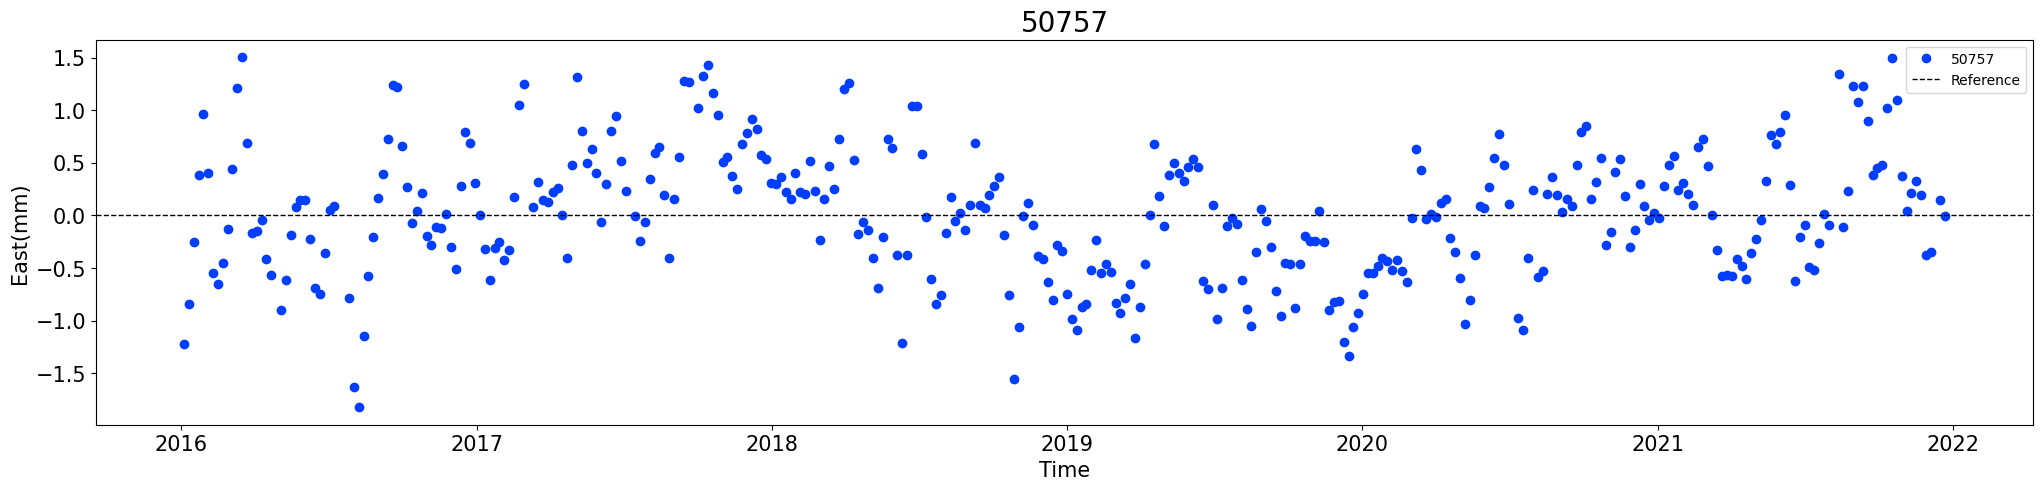

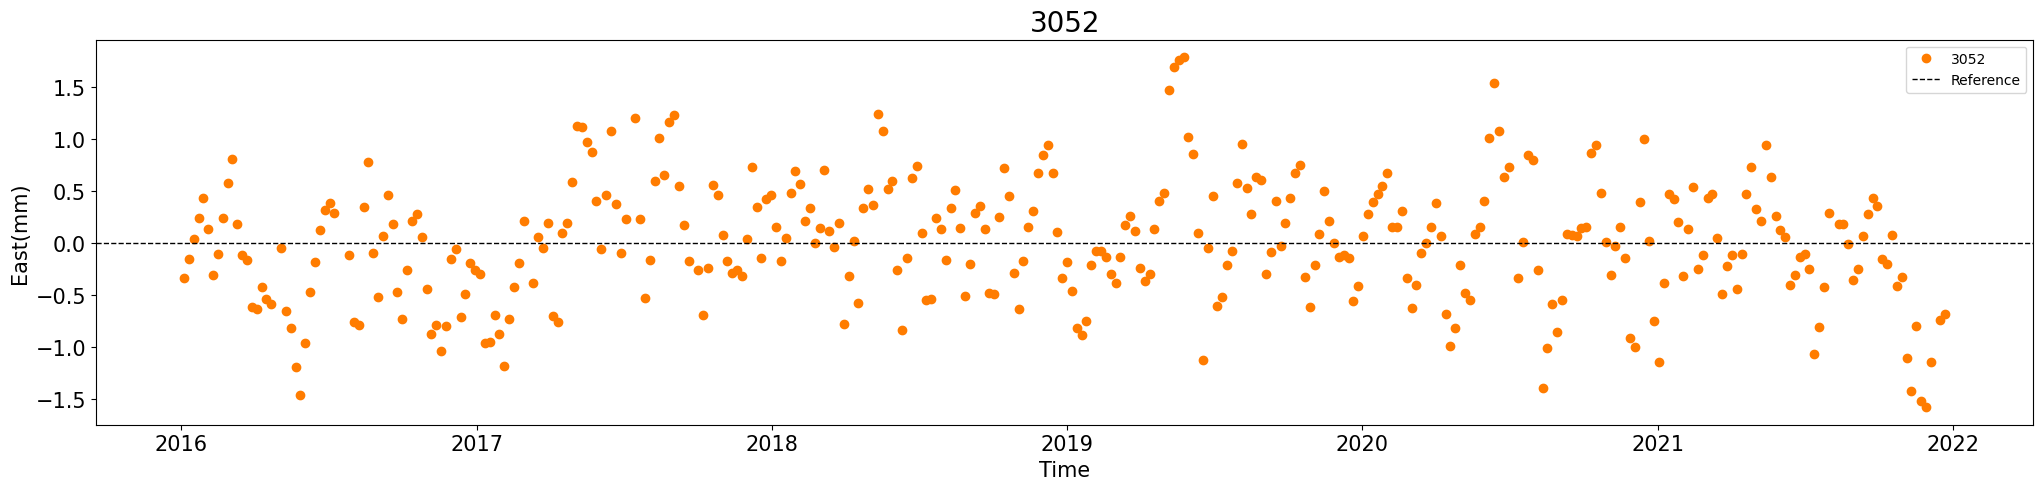

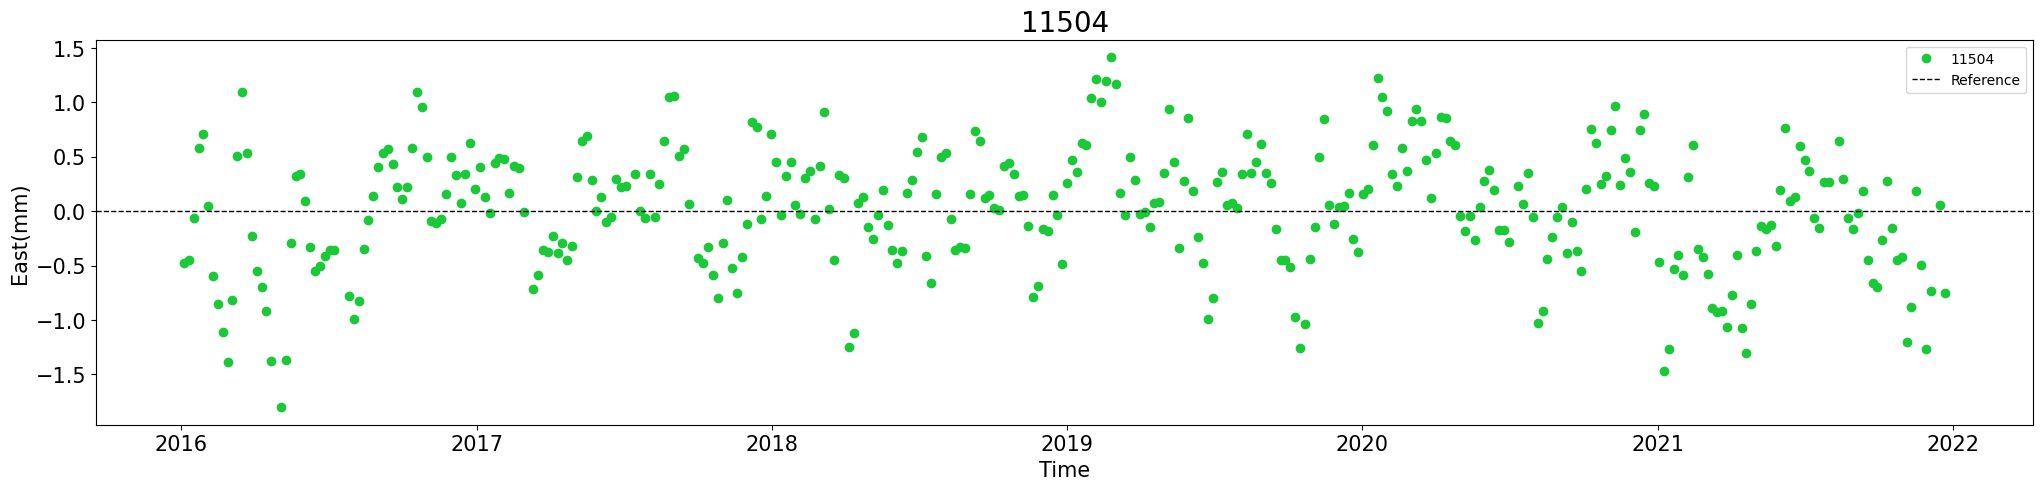

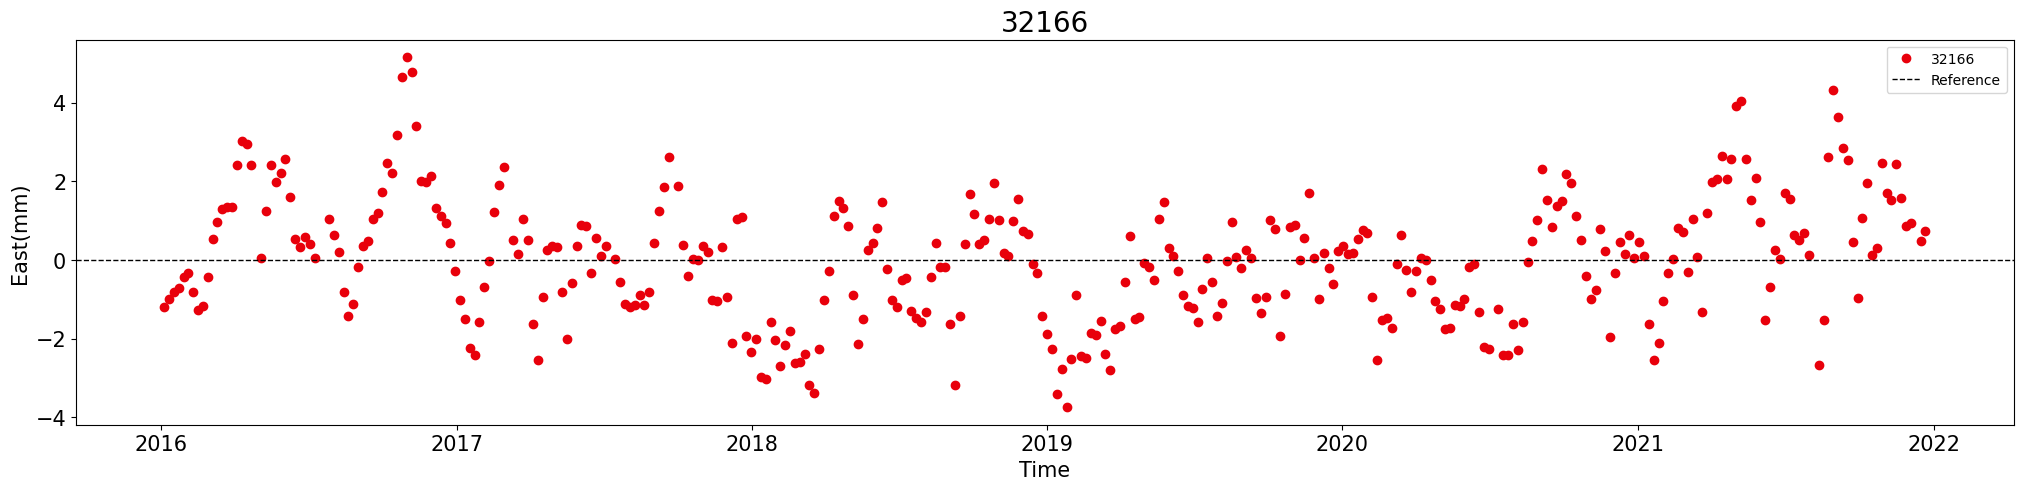

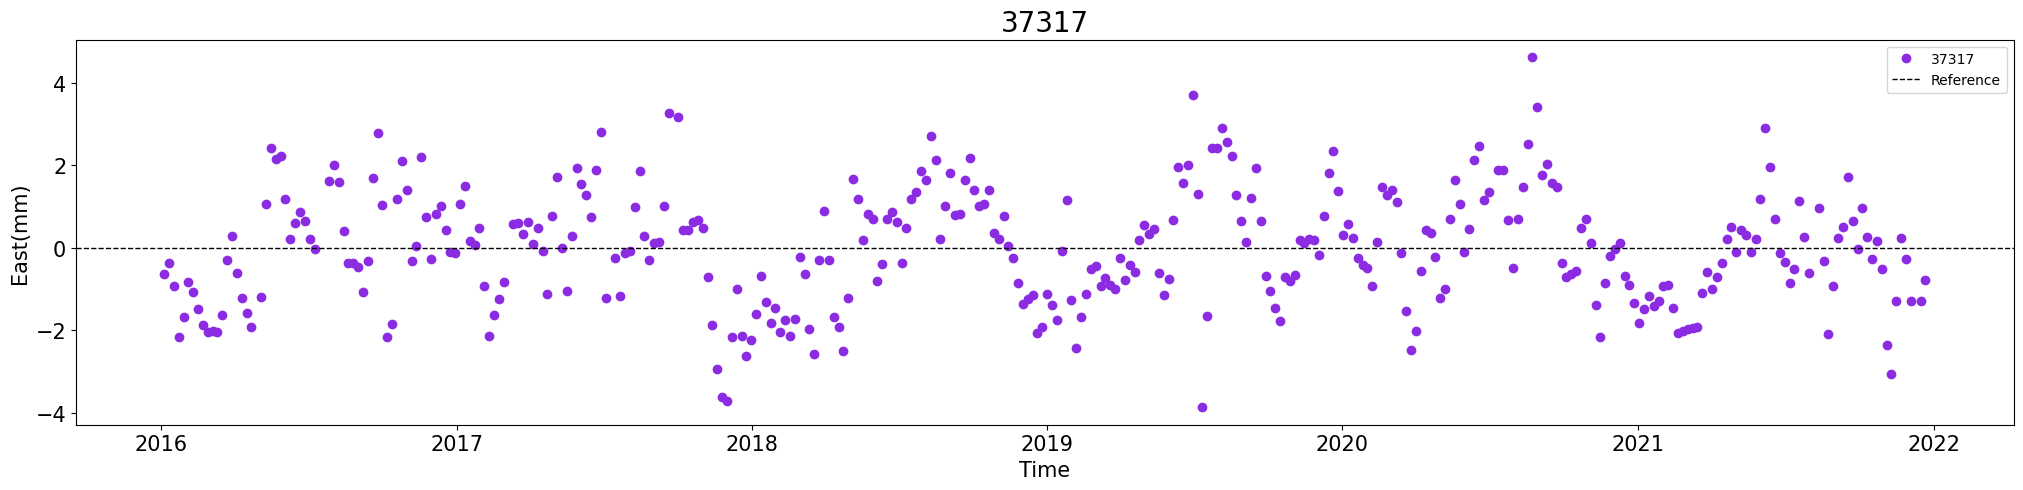

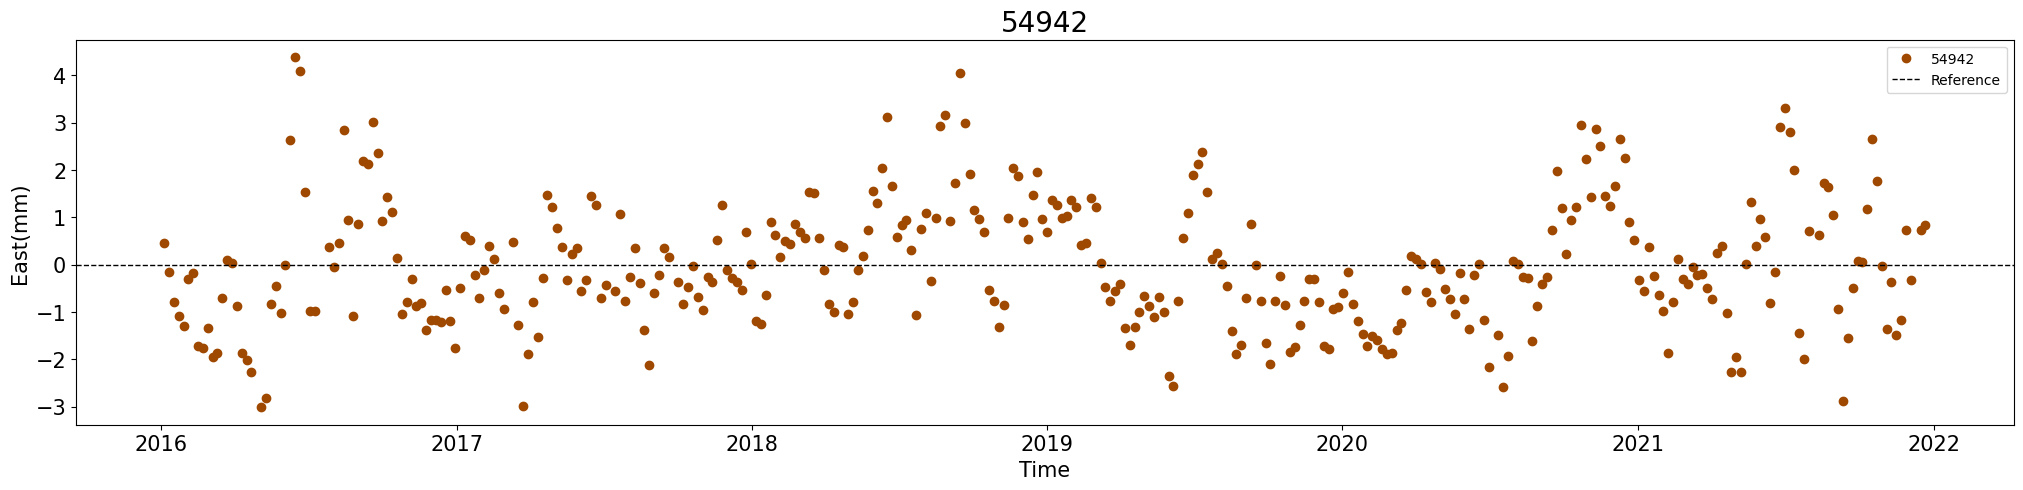

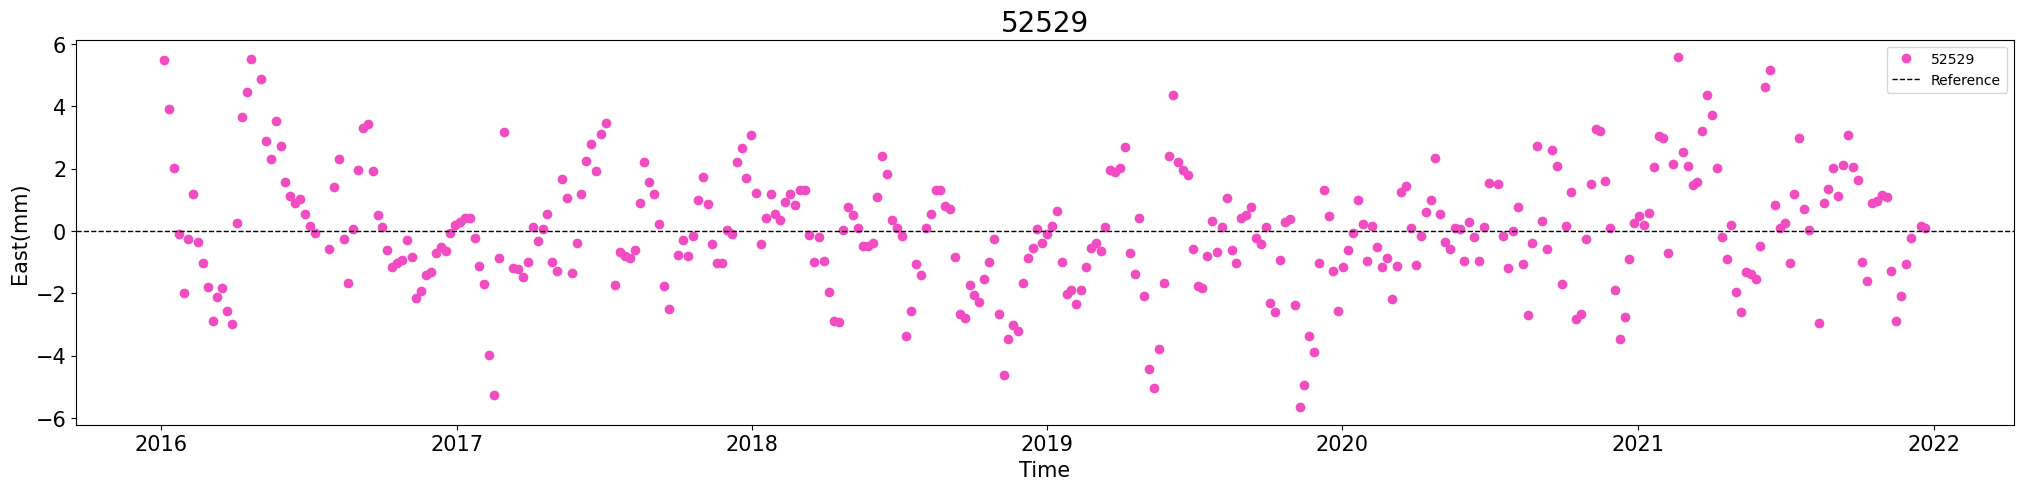

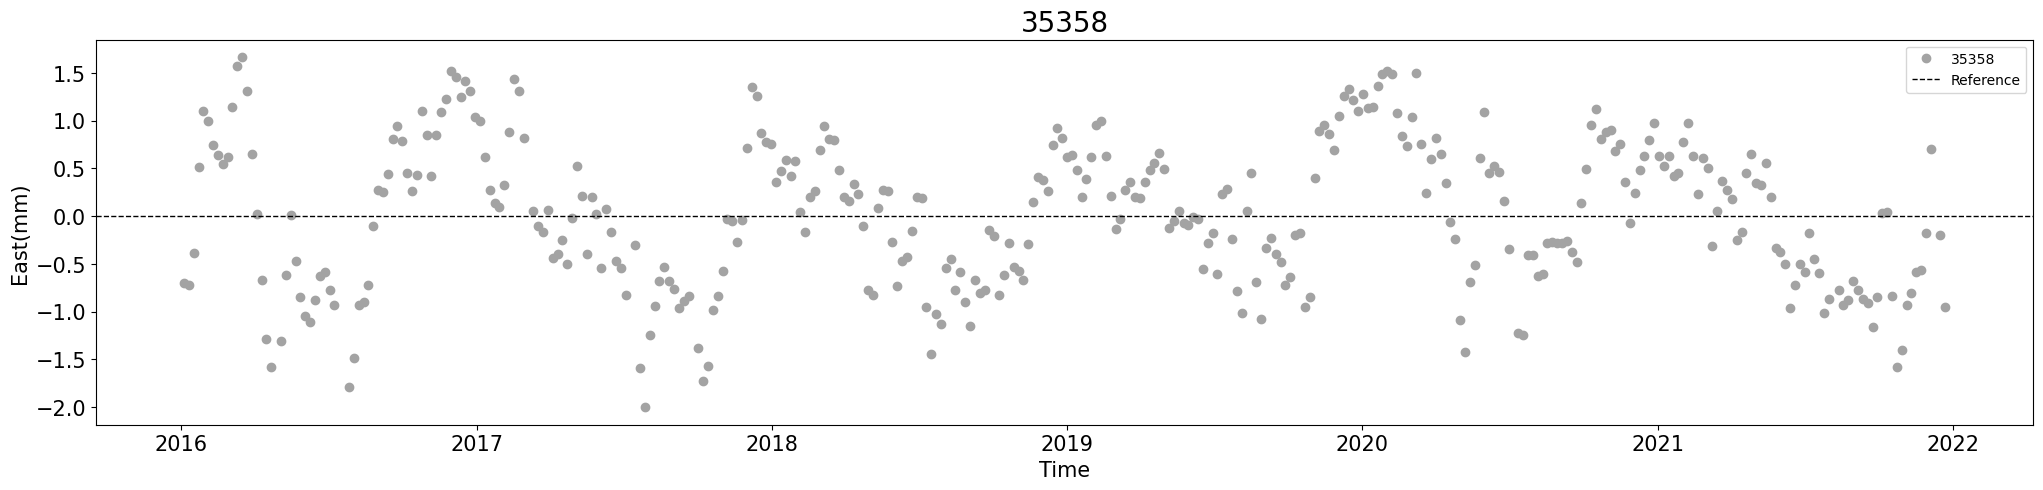

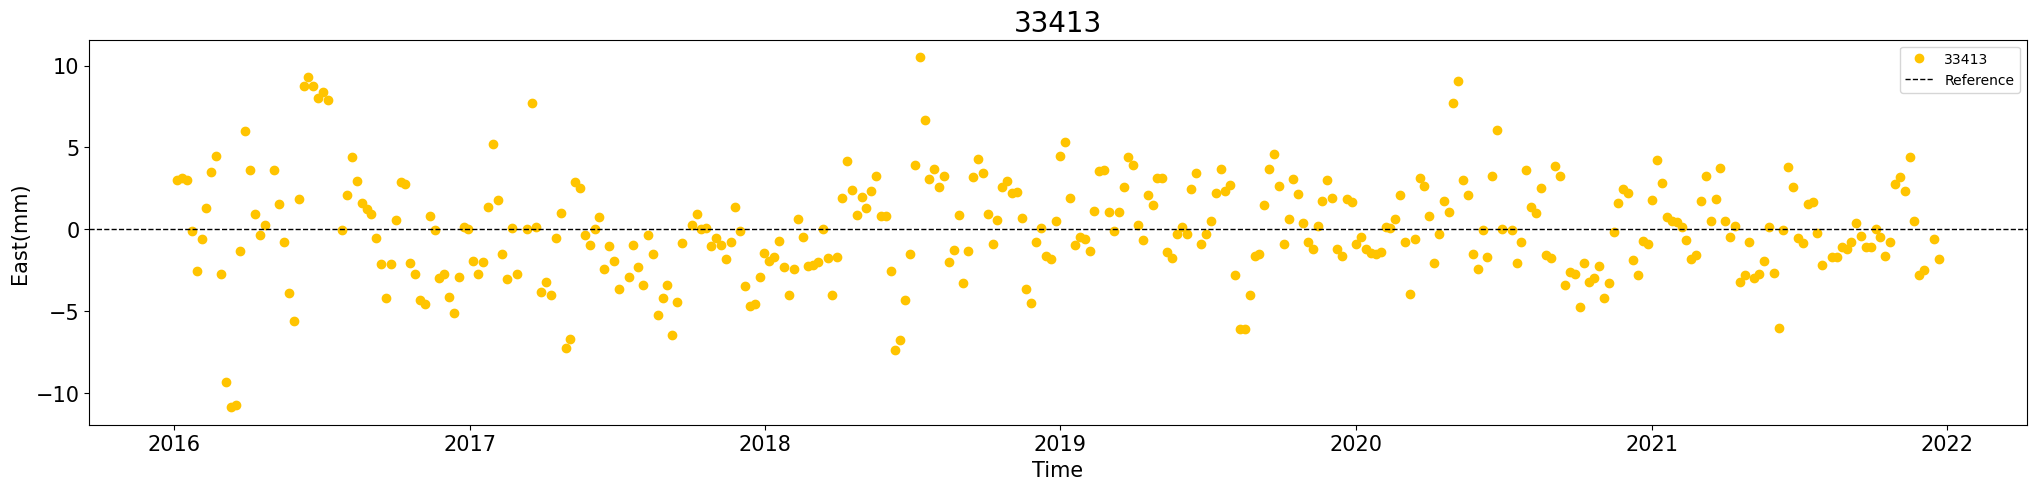

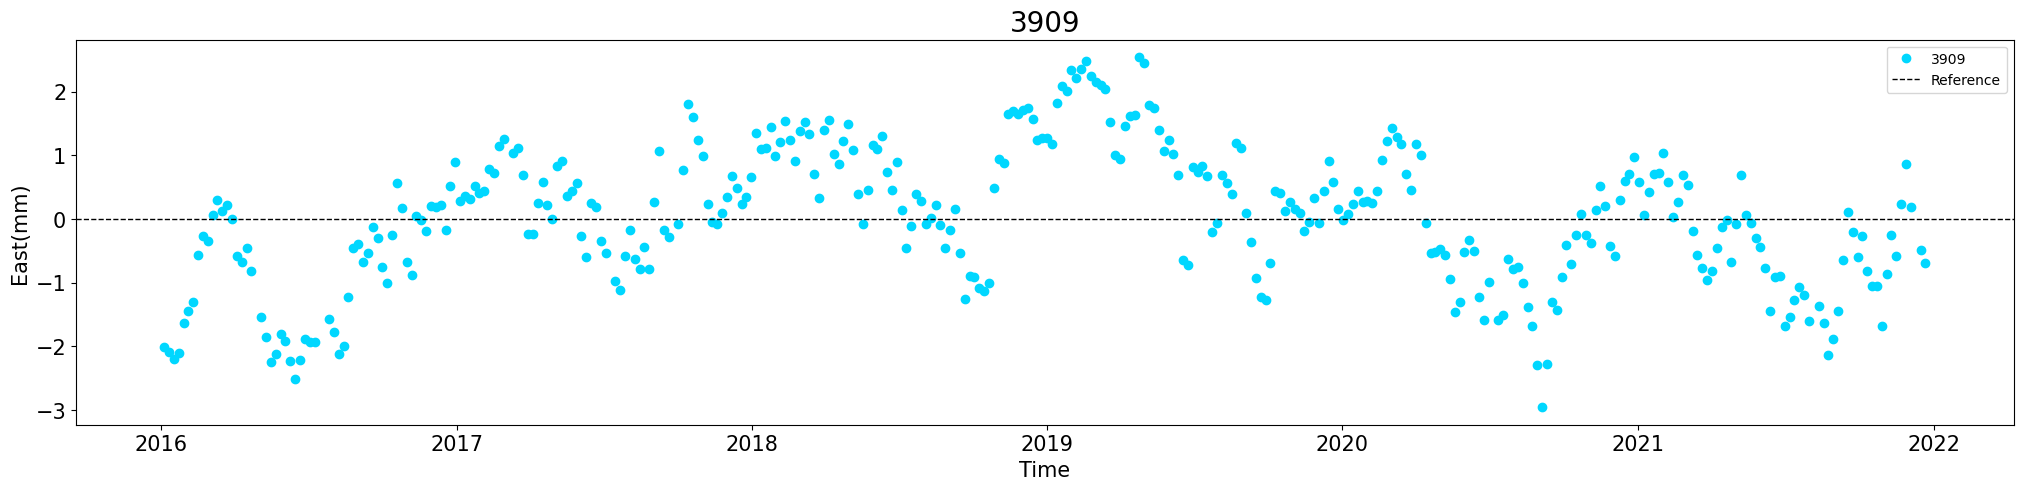

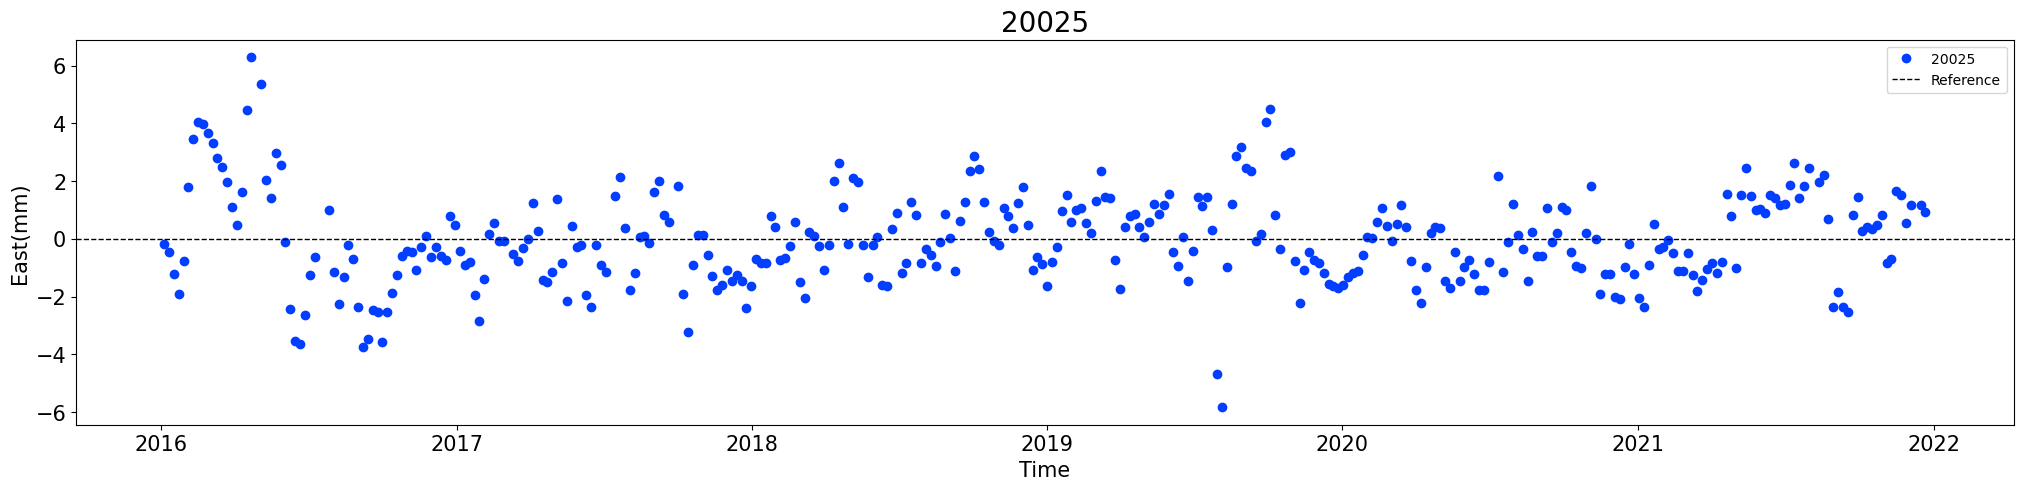

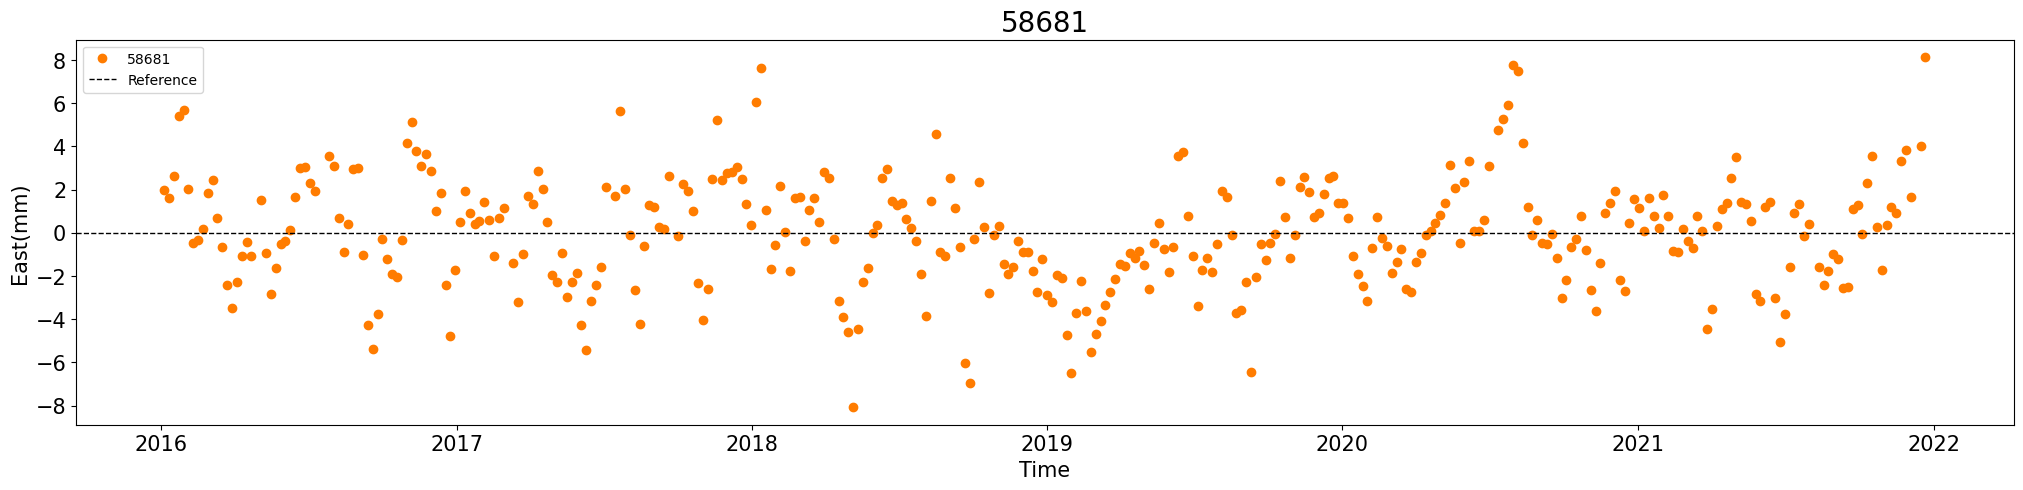

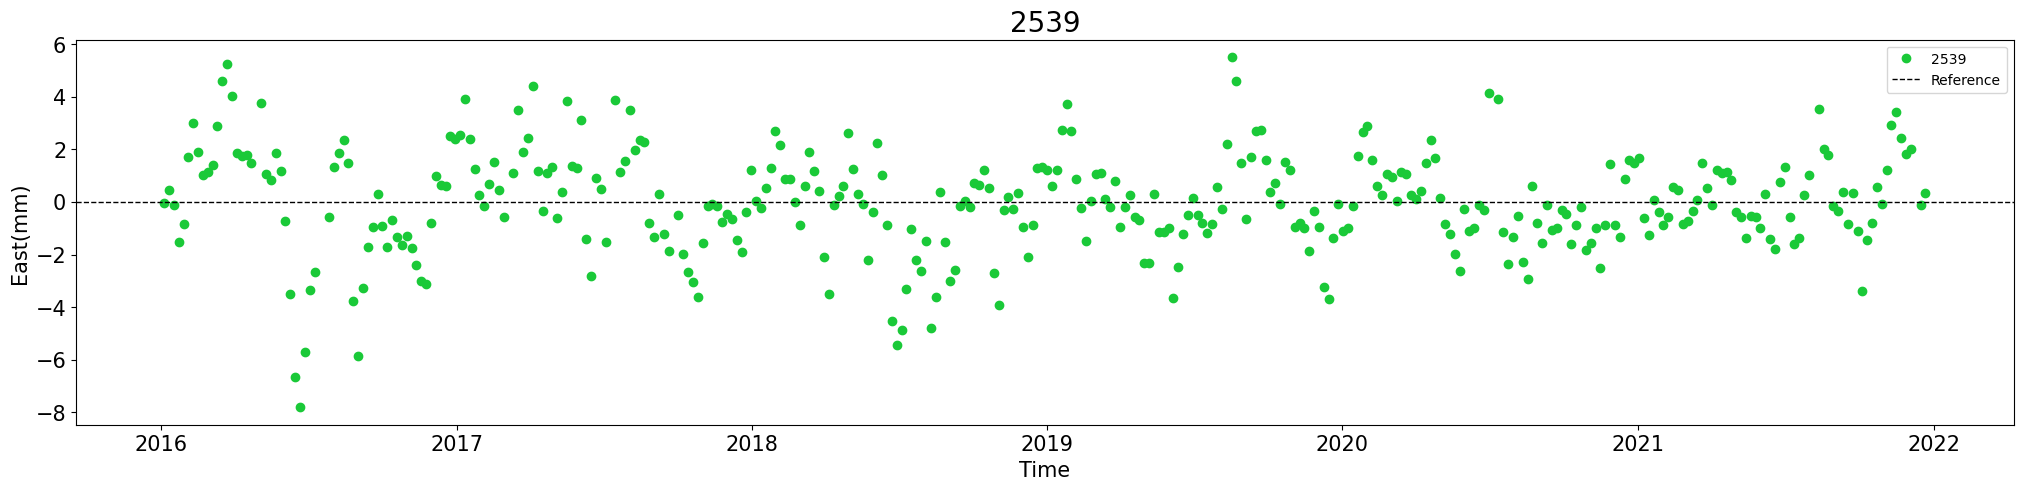

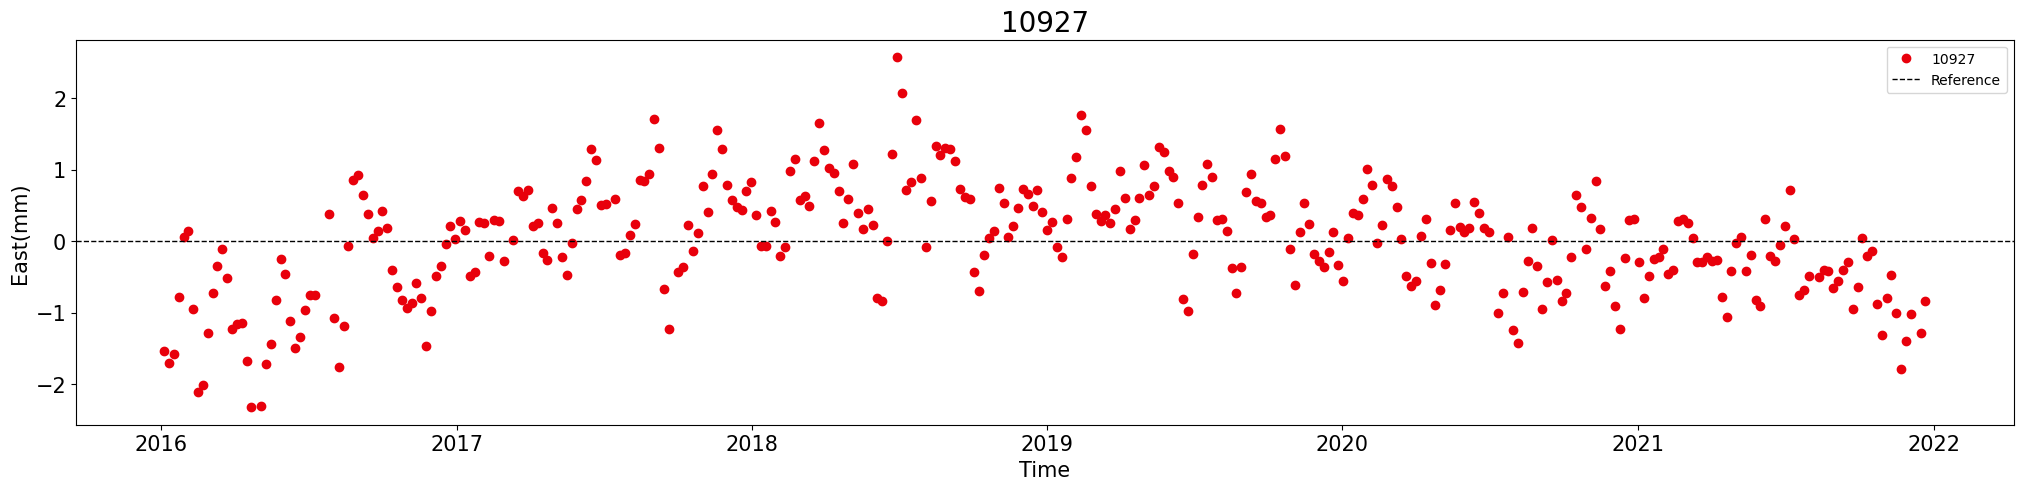

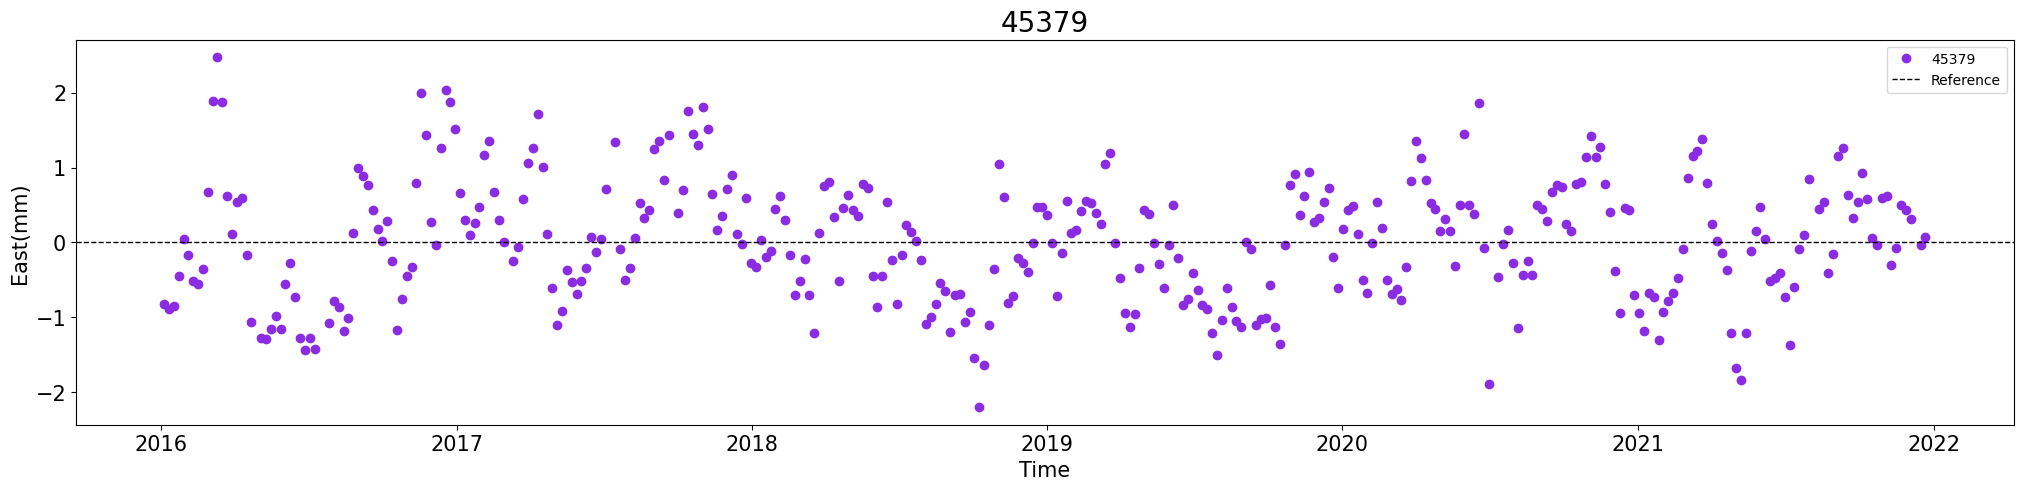

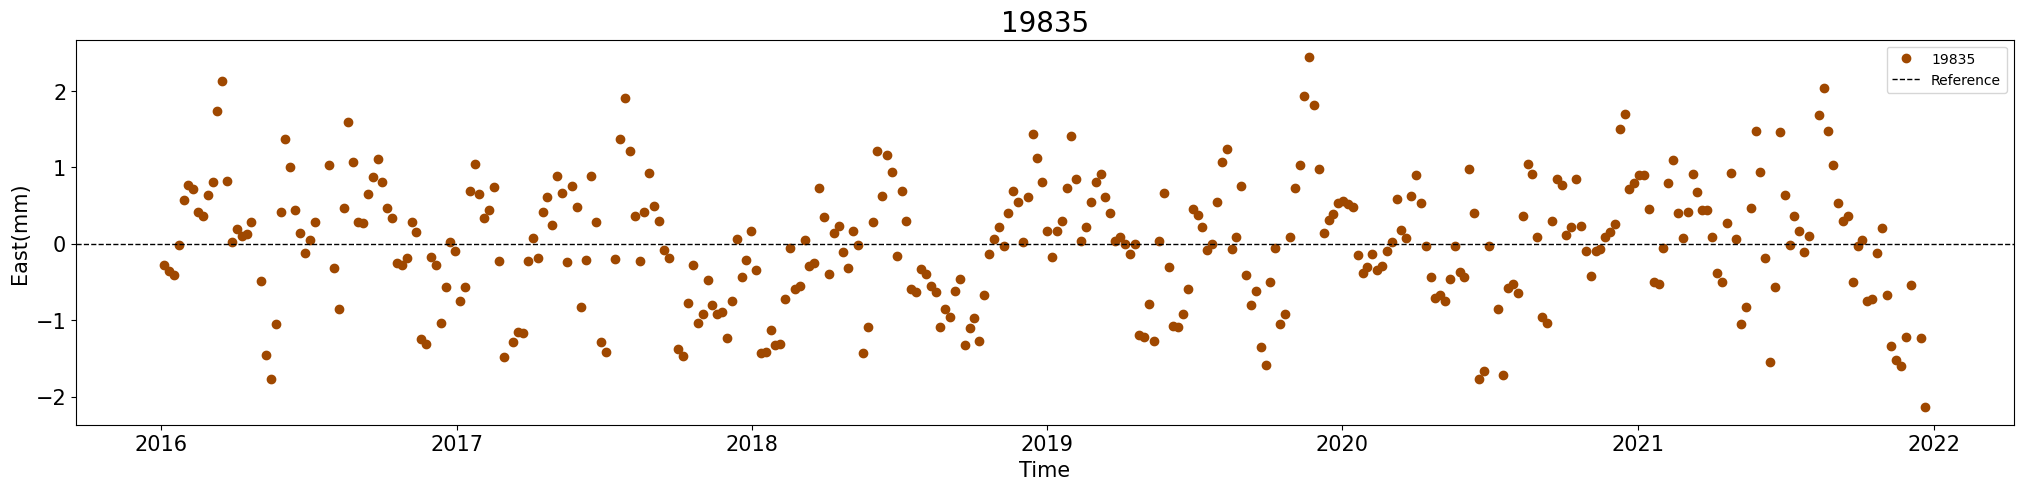

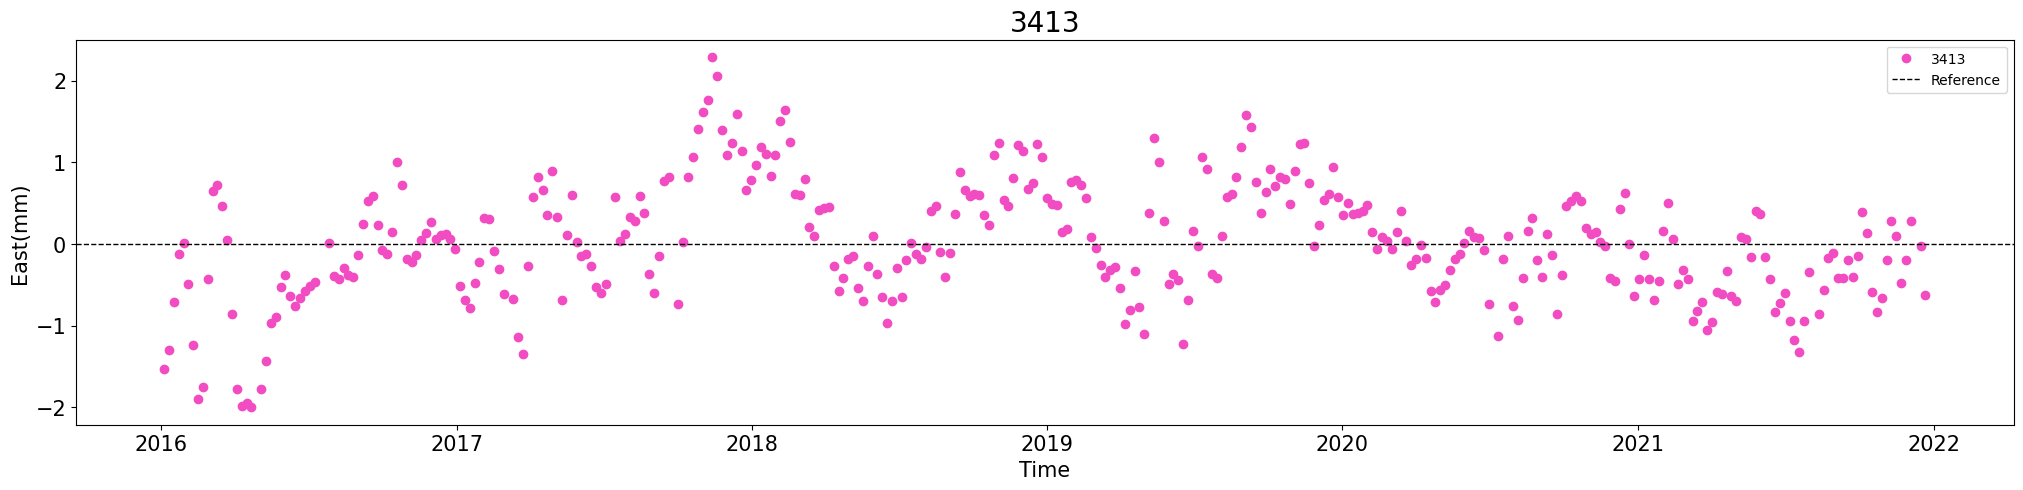

In [433]:
#checking the points plots - AFTER the reduction

colors = sns.color_palette("bright", len(points_avgrm_reduced))
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east/points_after_avg_rolling_mean'

for i, (column, color) in enumerate(zip(points_avgrm_reduced.columns, colors)):
    plt.figure(figsize=(25, 5))
    plt.plot(points_avgrm_reduced.index, points_avgrm_reduced[column], 'o', color=color, lw=2, label=column) 
    
    plt.title(f'{column}', fontsize = 20)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Reference')
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)                                       
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
    #plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

    plt.legend()
    
    fl = os.path.join(folder, f'{column}.svg')
    f = io.BytesIO()
    plt.savefig(fl, format="svg")
    
    plt.show()

In [378]:
avg_rm_df

17

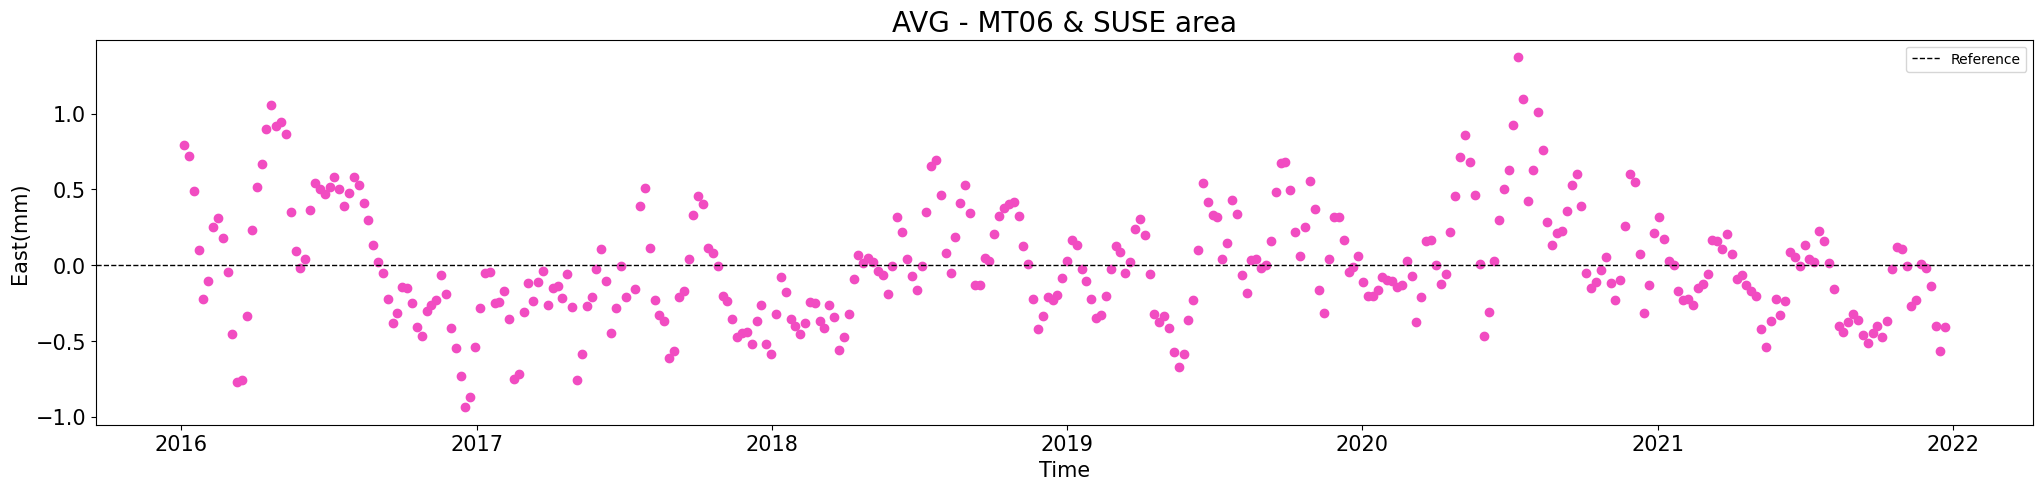

In [437]:
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east'

plt.figure(figsize=(25, 5))

plt.plot(avg_rm_df.index, avg_rm_df, 'o', color=color, lw=2) 
plt.title('AVG - MT06 & SUSE area', fontsize = 20)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Reference')
plt.xlabel('Time', fontsize = 15)
plt.xticks(fontsize=15)
plt.ylabel('East(mm)', fontsize = 15)                                       
plt.yticks(fontsize=15)
#plt.ylim(-0.008,0.008)
#plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

plt.legend()
    
fl = os.path.join(folder, 'AVG - MT06 + SUSE area.svg')
f = io.BytesIO()
plt.savefig(fl, format="svg")
    
plt.show()